# Proyecto de Limpieza y Análisis de Datos
### Base: Matriculados históricos en Colombia



## Justificación de la elección del dataset

Seleccionamos la base de *matriculados históricos en Colombia* porque refleja información académica y sociodemográfica de estudiantes, lo cual resulta relevante para nuestra formación en **Ingeniería Industrial**.
Este tipo de información permite identificar tendencias educativas, distribución por estrato socioeconómico, programas más demandados,
y variables asociadas al acceso a la educación superior, que son útiles para la planeación y gestión de recursos en instituciones educativas.



## Carga del dataset

En esta sección se monta Google Drive y se carga el archivo `MATRICULADOS_HISTÓRICO.csv` para trabajar con él de forma permanente.



In [ ]:
import pandas as pd

# Se pone la ruta del archivo
file_path = "/content/drive/MyDrive/MATRICULADOS_HISTÓRICO_20250913.csv"

# Se carga la base de datos
df = pd.read_csv(file_path, sep=";", encoding="latin1", low_memory=False)

# Se verifica que se que se cargaron bien las dimensiones y las primeras filas
print("Dimensiones:", df.shape)
df.head()


Dimensiones: (150458, 16)


,VIGENCIA,TIPO,GENERO,ESTADO_CIVIL,NACIONALIDAD,DEPA_PRO_COLEGIO,CIUDAD_PRO_COLEGIO,DEPA_RESI,CIUDAD_RESI,FACULTAD,PROGRAMA,MODALIDAD,METODOLOGIA,JORNADA,SEDE,ESTRATO
0,2019-1,MATRICULADO,MASCULINO,CASADO,COLOMBIANO,SIN DEPTO,SIN INFO,QUINDÃO,ARMENIA,"FACULTAD DE CIENCIAS ECONOMICAS, ADMINISTRATIV...",ADMINISTRACION DE NEGOCIOS DISTANCIA,PREGRADO,DISTANCIA TRADICIONAL,DIURNA,SEDE ARMENIA,1
1,2019-1,MATRICULADO,MASCULINO,SOLTERO,COLOMBIANO,QUINDÃO,ARMENIA,QUINDÃO,ARMENIA,"FACULTAD DE CIENCIAS ECONOMICAS, ADMINISTRATIV...",ADMINISTRACION DE NEGOCIOS DISTANCIA,PREGRADO,DISTANCIA TRADICIONAL,DIURNA,SEDE ARMENIA,4
2,2019-1,MATRICULADO,MASCULINO,SOLTERO,COLOMBIANO,SIN DEPTO,SIN INFO,CALDAS,MANIZALES,"FACULTAD DE CIENCIAS ECONOMICAS, ADMINISTRATIV...",ADMINISTRACION DE NEGOCIOS DISTANCIA,PREGRADO,DISTANCIA TRADICIONAL,DIURNA,SEDE MANIZALES,1
3,2019-1,MATRICULADO,MASCULINO,CASADO,COLOMBIANO,SIN DEPTO,SIN INFO,VALLE DEL CAUCA,SANTIAGO DE CALI,"FACULTAD DE CIENCIAS ECONOMICAS, ADMINISTRATIV...",ADMINISTRACION DE NEGOCIOS DISTANCIA,PREGRADO,DISTANCIA TRADICIONAL,DIURNA,SEDE CALI,4
4,2019-1,MATRICULADO,MASCULINO,CASADO,COLOMBIANO,SIN DEPTO,SIN INFO,VALLE DEL CAUCA,BUGALAGRANDE,"FACULTAD DE CIENCIAS ECONOMICAS, ADMINISTRATIV...",ADMINISTRACION DE NEGOCIOS DISTANCIA,PREGRADO,DISTANCIA TRADICIONAL,DIURNA,SEDE ARMENIA,1


## 🔎Exploración inicial

Procedemos a revisar las dimensiones de la base de datos, los nombres de las columnas, los tipos de datos y el número de valores únicos.
Permitiendonos identificar posibles problemas como columnas irrelevantes, variables mal tipificadas y errores de digitación.


In [ ]:
# Informacion de las variables del Dataframe
df.info()

# Sacamos las estadísticas básicas
df.describe(include="all").transpose()

# Datos nulos por columna
df.isnull().sum()

# Valores únicos por columna
df.nunique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150458 entries, 0 to 150457
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   VIGENCIA            150458 non-null  object
 1   TIPO                150458 non-null  object
 2   GENERO              150458 non-null  object
 3   ESTADO_CIVIL        150458 non-null  object
 4   NACIONALIDAD        150458 non-null  object
 5   DEPA_PRO_COLEGIO    150458 non-null  object
 6   CIUDAD_PRO_COLEGIO  150458 non-null  object
 7   DEPA_RESI           150458 non-null  object
 8   CIUDAD_RESI         150458 non-null  object
 9   FACULTAD            150458 non-null  object
 10  PROGRAMA            150458 non-null  object
 11  MODALIDAD           150458 non-null  object
 12  METODOLOGIA         150458 non-null  object
 13  JORNADA             150458 non-null  object
 14  SEDE                150458 non-null  object
 15  ESTRATO             150458 non-null  object
dtypes:

,0
VIGENCIA,9
TIPO,1
GENERO,2
ESTADO_CIVIL,9
NACIONALIDAD,29
DEPA_PRO_COLEGIO,67
CIUDAD_PRO_COLEGIO,1141
DEPA_RESI,420
CIUDAD_RESI,971
FACULTAD,8


### Resultados de la exploración inicial

El dataset cargado contiene **150.458 registros** y **16 columnas**.  
Todas las variables fueron leídas como `object`, lo que indica que se reconocieron como texto,
aunque algunas deberían ser numéricas como por ejemplo: `VIGENCIA` y `ESTRATO`.  

Al revisar valores únicos:  
- `VIGENCIA`: 9 categorías, que representan los semestres entre 2019 y 2023.
- `TIPO`: solo 1 valor, por lo cual no aporta información relevante.
- `ESTRATO`: 8 categorías, consistente con el sistema colombiano.  
- `DEPA_RESI`: 420 categorías, cuando en realidad deberían ser 32 departamentos, lo que indica errores de digitación.
-  `PROGRAMA`: 107 categorías, lo que muestra gran diversidad académica.  



##1️⃣🧹 PRIMERA FASE DE LIMPIEZA DE DATOS

En este paso eliminamos columnas irrelevantes, revisamos valores nulos y duplicados,
normalizamos el formato de las variables categóricas (mayúsculas, sin espacios) y transformamos a numéricas las variables
que estaban mal tipificadas.

In [ ]:
# ==========================
# PRIMERA FASE DE LIMPIEZA
# ==========================

#1. Procedemos a eliminar la columna 'TIPO' porque no aporta información
df.drop(columns=["TIPO"], inplace=True)

#2. Sacamos el numero de valores nulos por columna
df.isnull().sum()

#3. Se revisan y se eliminan datos duplicados
print("Duplicados antes:", df.duplicated().sum())
df = df.drop_duplicates()
print("Duplicados después:", df.duplicated().sum())

#4. Limpiamos y unificamos textos en todas las columnas de tipo string, convirtiendo todo a mayusculas.
for col in df.columns:
    if df[col].dtype == "object":  # si la columna es texto
        df[col] = df[col].str.strip().str.upper()

#5. Convertimos a numericas las columnas Vigencia y Estrato
df["VIGENCIA"] = pd.to_numeric(df["VIGENCIA"], errors="coerce")
df["ESTRATO"] = pd.to_numeric(df["ESTRATO"], errors="coerce")

#6. Revisamos categorias atípicas: valores únicos después de la limpieza inicial
print("Departamentos de residencia únicos:", df["DEPA_RESI"].nunique())
print("Departamentos de colegio únicos:", df["DEPA_PRO_COLEGIO"].nunique())
print("Estratos únicos:", df["ESTRATO"].unique())

Duplicados antes: 78688
Duplicados después: 0
Departamentos de residencia únicos: 399
Departamentos de colegio únicos: 45
Estratos únicos: [ 1.  4.  2.  5.  3.  6.  0. nan]


### Resultados de la primera limpieza

En est primera etapa de depuración se eliminaron **78.688 registros duplicados**, dejando únicamente información única por estudiante.  
Esto permitió reducir el dataset y aumentar su calidad.  

Además, al revisar algunas variables encontramos lo siguiente:

- **Departamentos de residencia:** se identificaron **399 valores únicos**, lo cual es inconsistente, ya que Colombia tiene 32 departamentos. Esto sugiere errores de digitación, registros con municipios en lugar de departamentos o diferencias en la escritura.  
- **Departamentos de colegio:** se encontraron **45 valores únicos**, lo cual también supera la cantidad real de departamentos y refleja el mismo problema de codificación.  
- **Estrato socioeconómico:** se detectaron valores fuera del rango permitido (1 a 6), como el `0`, además de valores faltantes (`NaN`).  

Como resultado la base de datos ahora está libre de duplicados, pero persisten problemas de codificación y valores anómalos que serán corregidos en la siguiente fase de limpieza.

## ⬇️Instalación de librería `unidecode`

Para poder normalizar los nombres de los departamentos, se necesita instalar la librería **Unidecode**, que no viene incluida por defecto en Google Colab.


In [ ]:
!pip install unidecode


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.4 MB/s eta 0:00:00


##2️⃣🧹 SEGUNDA FASE DE LIMPIEZA DE DATOS

Avanzamos con una segunda fase de depuración que se centrará en dos aspectos clave:

- **Estrato socioeconómico:**  
  Validar que los valores estén en el rango correcto (1 a 6). Los valores inválidos como `0` o nulos serán reemplazados por la categoría **"SIN ESTRATO"**.

- **Departamentos de residencia y colegio:**  
  Estandarizar los nombres y compararlos con la lista oficial de departamentos de Colombia.  
  Aquellos valores inconsistentes o mal digitados se reclasificarán en una nueva categoría llamada **"OTRO"**.


In [ ]:
# ==========================
# SEGUNDA FASE DE LIMPIEZA
# ==========================

# 1. Limpieza de Estrato
# ----------------------
# Convertimos la columna 'ESTRATO' a numérica (por si está como texto).
# Los valores 0 y NaN no corresponden a estratos válidos, así que se proceden a reemplazar por "SIN ESTRATO".
df['ESTRATO'] = pd.to_numeric(df['ESTRATO'], errors='coerce')
df['ESTRATO'] = df['ESTRATO'].replace(0, pd.NA)
df['ESTRATO'] = df['ESTRATO'].fillna("SIN ESTRATO")

print("Valores únicos en Estrato después de limpieza:", df['ESTRATO'].unique())

# 2. Limpieza de Departamentos
# -----------------------------
# Procedemos a crear una lista oficial de los 32 departamentos de Colombia incluyendo Bogotá D.C.
departamentos_colombia = ["AMAZONAS","ANTIOQUIA","ARAUCA","ATLÁNTICO","BOLÍVAR","BOYACÁ","CALDAS","CAQUETÁ","CASANARE","CAUCA",
    "CESAR","CHOCÓ","CÓRDOBA","CUNDINAMARCA","GUAINÍA","GUAVIARE","HUILA","LA GUAJIRA","MAGDALENA","META",
    "NARIÑO","NORTE DE SANTANDER","PUTUMAYO","QUINDÍO","RISARALDA","SAN ANDRÉS","SANTANDER","SUCRE","TOLIMA",
    "VALLE DEL CAUCA","VAUPÉS","VICHADA","BOGOTÁ"]

# Normalizamos los nombres en mayúsculas y sin tildes para comparar mejor
import unidecode
df['DEPA_RESI'] = df['DEPA_RESI'].str.upper().apply(lambda x: unidecode.unidecode(str(x)))
df['DEPA_PRO_COLEGIO'] = df['DEPA_PRO_COLEGIO'].str.upper().apply(lambda x: unidecode.unidecode(str(x)))

# Marcamos como "OTRO" los que no estén en la lista oficial de departamentos
df['DEPA_RESI'] = df['DEPA_RESI'].apply(lambda x: x if x in departamentos_colombia else "OTRO")
df['DEPA_PRO_COLEGIO'] = df['DEPA_PRO_COLEGIO'].apply(lambda x: x if x in departamentos_colombia else "OTRO")

print("Departamentos de residencia únicos después de limpieza:", df['DEPA_RESI'].nunique())
print("Departamentos de colegio únicos después de limpieza:", df['DEPA_PRO_COLEGIO'].nunique())


Valores únicos en Estrato después de limpieza: [1.0 4.0 2.0 5.0 3.0 6.0 'SIN ESTRATO']
Departamentos de residencia únicos después de limpieza: 22
Departamentos de colegio únicos después de limpieza: 22


In [ ]:
# Diagnóstico: ver primeras líneas del CSV para confirmar separador y encabezados
ruta = "/content/drive/MyDrive/MATRICULADOS_HISTÓRICO_20250913.csv"

with open(ruta, "r", encoding="latin1", errors="ignore") as f:
    for _ in range(5):
        print(f.readline().rstrip())


VIGENCIA;TIPO;GENERO;ESTADO_CIVIL;NACIONALIDAD;DEPA_PRO_COLEGIO;CIUDAD_PRO_COLEGIO;DEPA_RESI;CIUDAD_RESI;FACULTAD;PROGRAMA;MODALIDAD;METODOLOGIA;JORNADA;SEDE;ESTRATO
2019-1;MATRICULADO;MASCULINO;CASADO;COLOMBIANO;SIN DEPTO;SIN INFO;QUINDÃO;ARMENIA;FACULTAD DE CIENCIAS ECONOMICAS, ADMINISTRATIVAS Y CONTABLES;ADMINISTRACION DE NEGOCIOS DISTANCIA;PREGRADO;DISTANCIA TRADICIONAL;DIURNA;SEDE ARMENIA;1
2019-1;MATRICULADO;MASCULINO;SOLTERO;COLOMBIANO;QUINDÃO;ARMENIA;QUINDÃO;ARMENIA;FACULTAD DE CIENCIAS ECONOMICAS, ADMINISTRATIVAS Y CONTABLES;ADMINISTRACION DE NEGOCIOS DISTANCIA;PREGRADO;DISTANCIA TRADICIONAL;DIURNA;SEDE ARMENIA;4
2019-1;MATRICULADO;MASCULINO;SOLTERO;COLOMBIANO;SIN DEPTO;SIN INFO;CALDAS;MANIZALES;FACULTAD DE CIENCIAS ECONOMICAS, ADMINISTRATIVAS Y CONTABLES;ADMINISTRACION DE NEGOCIOS DISTANCIA;PREGRADO;DISTANCIA TRADICIONAL;DIURNA;SEDE MANIZALES;1
2019-1;MATRICULADO;MASCULINO;CASADO;COLOMBIANO;SIN DEPTO;SIN INFO;VALLE DEL CAUCA;SANTIAGO DE CALI;FACULTAD DE CIENCIAS ECONOMICAS

In [ ]:
import pandas as pd

ruta = "/content/drive/MyDrive/MATRICULADOS_HISTÓRICO_20250913.csv"

# Carga "cruda" forzando texto
raw = pd.read_csv(
    ruta,
    sep=";",
    encoding="latin1",
    dtype=str,
    keep_default_na=False,
    engine="python"
)

# Normalizamos encabezados y limpiamos posibles BOM/espacios
raw.columns = (raw.columns
               .str.replace("\ufeff", "", regex=False)
               .str.strip()
               .str.upper())

print("¿VIGENCIA está?", "VIGENCIA" in raw.columns)
print("Ejemplos VIGENCIA:", raw["VIGENCIA"].head(10).tolist() if "VIGENCIA" in raw.columns else "N/A")
print("Dimensiones raw:", raw.shape)


¿VIGENCIA está? True
Ejemplos VIGENCIA: ['2019-1', '2019-1', '2019-1', '2019-1', '2019-1', '2019-1', '2019-1', '2019-1', '2019-1', '2019-1']
Dimensiones raw: (150458, 16)


### Resultados de la segunda fase de limpieza de datos

En esta etapa se abordaron dos problemas principales:

1. **Estrato socioeconómico**  
   - Se convirtieron los valores de la columna `ESTRATO` a numéricos.  
   - Se eliminaron los valores inválidos como `0` y los valores faltantes (`NaN`). Estos se reemplazaron por la categoría **"SIN ESTRATO"**.  
   - Resultado: ahora los valores de estrato están correctamente dentro del rango **1 a 6**, más la categoría "SIN ESTRATO".  

2. **Departamentos de residencia y colegio**  
   - Se estandarizaron los nombres a mayúsculas y sin tildes.  
   - Se compararon con la lista oficial de departamentos de Colombia.  
   - Los valores inconsistentes fueron reclasificados en la categoría **"OTRO"**.  
   - Resultado: las variables quedaron con **22 valores únicos** cada una, reduciendo los problemas de codificación.  



## 3️⃣🧹TERCERA FASE DE LIMPIEZA DE DATOS

En esta fase vamos a depurar y estandarizar variables categóricas relacionadas con las características de los estudiantes.  

- **Estado civil:** unificar categorías para evitar duplicados escritos de forma distinta.  
- **Modalidad:** validar que las categorías correspondan a las formas de estudio existentes.  
- **Metodología:** estandarizar en valores como Presencial, Virtual o Distancia.  
- **Jornada:** asegurar que solo existan jornadas válidas como Diurna, Nocturna, Mixta.  



In [ ]:
# ==========================
# TERCERA FASE DE LIMPIEZA
# ==========================

# 1. Limpieza de ESTADO CIVIL
# ----------------------------
df['ESTADO_CIVIL'] = df['ESTADO_CIVIL'].str.upper().str.strip()

# Definimos categorías esperadas
categorias_estado = {"SOLTERO": "SOLTERO","SOLTERA": "SOLTERO","CASADO": "CASADO",
"CASADA": "CASADO","UNION LIBRE": "UNION LIBRE","DIVORCIADO": "DIVORCIADO",
"DIVORCIADA": "DIVORCIADO","VIUDO": "VIUDO","VIUDA": "VIUDO","OTRO": "OTRO"}
df['ESTADO_CIVIL'] = df['ESTADO_CIVIL'].replace(categorias_estado)

print("Valores únicos en Estado Civil:", df['ESTADO_CIVIL'].unique())

# 2. Limpieza de MODALIDAD
# ----------------------------
df['MODALIDAD'] = df['MODALIDAD'].str.upper().str.strip()
print("Valores únicos en Modalidad:", df['MODALIDAD'].unique())

# 3. Limpieza de METODOLOGÍA
# ----------------------------
df['METODOLOGIA'] = df['METODOLOGIA'].str.upper().str.strip()

categorias_metodo = {"PRESENCIAL": "PRESENCIAL","DISTANCIA": "DISTANCIA","VIRTUAL": "VIRTUAL"}
df['METODOLOGIA'] = df['METODOLOGIA'].replace(categorias_metodo)

print("Valores únicos en Metodología:", df['METODOLOGIA'].unique())

# 4. Limpieza de JORNADA
# ----------------------------
df['JORNADA'] = df['JORNADA'].str.upper().str.strip()

categorias_jornada = {"DIURNA": "DIURNA","NOCTURNA": "NOCTURNA","MIXTA": "MIXTA","FIN DE SEMANA": "FIN DE SEMANA"}
df['JORNADA'] = df['JORNADA'].replace(categorias_jornada)

print("Valores únicos en Jornada:", df['JORNADA'].unique())


Valores únicos en Estado Civil: ['CASADO' 'SOLTERO' 'UNION LIBRE' 'DIVORCIADO' 'VIUDO' 'OTRO' 'SEPARADO'
 'NO REGISTRA' 'RELIGIOSOS']
Valores únicos en Modalidad: ['PREGRADO' 'POSGRADO' 'POSTGRADO']
Valores únicos en Metodología: ['DISTANCIA TRADICIONAL' 'PRESENCIAL' 'DISTANCIA VIRTUAL']
Valores únicos en Jornada: ['DIURNA' 'NOCTURNA' 'MIXTA' 'DIURNA EXTENDIDA']


### Resultados y observaciones

Tras la tercera fase de limpieza, se evidenció que aún persisten algunas inconsistencias en variables
categóricas:

- **Modalidad**: aparecen valores como *"POSGRADO"* y *"POSTGRADO"*, que en la práctica representan
  lo mismo pero se encuentran duplicados por diferencias de escritura.  
- **Metodología**: se identifican variantes como *"DISTANCIA TRADICIONAL"* y *"DISTANCIA VIRTUAL"*,
  que podrían agruparse bajo una misma categoría general de *"DISTANCIA"*.  
- **Jornada**: surge la categoría *"DIURNA EXTENDIDA"*, que no estaba contemplada inicialmente y se
  debe decidir si unificarla con *"DIURNA"* o mantenerla aparte.  
- **Estado Civil**: aunque las categorías son claras, es necesario verificar si valores como
  *"RELIGIOSOS"* deben permanecer como categoría independiente o ser incluidos dentro de *"OTRO"*.  

Por lo tanto, se procede a continuar con la etapa de limpieza para estandarizar estas variables y
garantizar consistencia en el conjunto de datos.



In [ ]:
# ==========================
# SEGUIMIENTO A TERCERA FASE DE LIMPIEZA
# ==========================

# 1. Normalizamos Modalidad
# ----------------------------
df['MODALIDAD'] = df['MODALIDAD'].str.upper().str.strip()
df['MODALIDAD'] = df['MODALIDAD'].replace({'POSGRADO': 'POSTGRADO'})

print("Valores únicos en Modalidad:", df['MODALIDAD'].unique())

# 2. Normalizamos Metodología
# ----------------------------
df['METODOLOGIA'] = df['METODOLOGIA'].str.upper().str.strip()
df['METODOLOGIA'] = df['METODOLOGIA'].replace({'DISTANCIA TRADICIONAL': 'DISTANCIA','DISTANCIA VIRTUAL': 'VIRTUAL'})

print("Valores únicos en Metodología:", df['METODOLOGIA'].unique())

# 3. Normalizamos Jornada
# ----------------------------
df['JORNADA'] = df['JORNADA'].str.upper().str.strip()
df['JORNADA'] = df['JORNADA'].replace({'DIURNA EXTENDIDA': 'DIURNA'})

print("Valores únicos en Jornada:", df['JORNADA'].unique())


Valores únicos en Modalidad: ['PREGRADO' 'POSTGRADO']
Valores únicos en Metodología: ['DISTANCIA' 'PRESENCIAL' 'VIRTUAL']
Valores únicos en Jornada: ['DIURNA' 'NOCTURNA' 'MIXTA']


In [ ]:
# 4. Limpieza de ESTADO CIVIL
# ----------------------------
df['ESTADO_CIVIL'] = df['ESTADO_CIVIL'].str.upper().str.strip()

map_estado_civil = {"UNION LIBRE": "OTRO","RELIGIOSOS": "OTRO","SEPARADO": "SEPARADO/DIVORCIADO","DIVORCIADO": "SEPARADO/DIVORCIADO","NO REGISTRA": "SIN INFORMACIÓN"}

df['ESTADO_CIVIL'] = df['ESTADO_CIVIL'].replace(map_estado_civil)

print("Valores únicos en Estado Civil:", df['ESTADO_CIVIL'].unique())

# 5. Limpieza de NACIONALIDAD
# ----------------------------
import unidecode

df['NACIONALIDAD'] = df['NACIONALIDAD'].str.upper().apply(lambda x: unidecode.unidecode(str(x)))

# Unificamos todo lo relacionado con Colombia
df['NACIONALIDAD'] = df['NACIONALIDAD'].replace(["COLOMBIANO", "COLOMBIANOS", "COLOMBIANA", "COLOMBIANAS", "COLOMBIA"],"COLOMBIANA")

# Los demás quedan como EXTRANJERO
df.loc[df['NACIONALIDAD'] != "COLOMBIANA", 'NACIONALIDAD'] = "EXTRANJERO"

print("Valores únicos en Nacionalidad:", df['NACIONALIDAD'].unique())


Valores únicos en Estado Civil: ['CASADO' 'SOLTERO' 'OTRO' 'SEPARADO/DIVORCIADO' 'VIUDO' 'SIN INFORMACIÓN']
Valores únicos en Nacionalidad: ['COLOMBIANA' 'EXTRANJERO']


### Resultado de limpieza de categorias Estado Civil y Nacionalidad:
Estado Civil:
- Se unificaron categorías redundantes como SEPARADO y DIVORCIADO en una sola: SEPARADO/DIVORCIADO.
- Se eliminó la dispersión de respuestas atípicas como NO REGISTRA o RELIGIOSOS, que pasaron a OTRO o SIN INFORMACIÓN.
→ Resultado final: ['CASADO', 'SOLTERO', 'OTRO', 'SEPARADO/DIVORCIADO', 'VIUDO', 'SIN INFORMACIÓN']

Nacionalidad:
- Se simplificaron las múltiples nacionalidades, agrupándolas en solo dos categorías: COLOMBIANA y EXTRANJERO.
→ Resultado final: ['COLOMBIANA', 'EXTRANJERO']

## 4️⃣🧹CUARTA FASE DE LIMPIEZA DE DATOS

En esta etapa normalizaremos las ciudades y programas académicos, y depurar variables de texto que presentan una alta cantidad de categorías debido a diferencias en digitación, uso de mayúsculas, tildes o abreviaciones.

- Ciudades (residencia y procedencia del colegio):
Se normalizarán todos los nombres a mayúsculas, sin tildes ni espacios innecesarios.
- Facultades y programas académicos:
Se revisarán las denominaciones de facultades y programas para identificar y corregir inconsistencias, tales como abreviaciones o nombres escritos de manera distinta para un mismo programa.

In [ ]:
# ========================================
# CUARTA FASE DE LIMPIEZA
# ========================================

# 4. Limpieza de Ciudades (Residencia y Colegio)
# ----------------------------
import re
import numpy as np
import pandas as pd
import unidecode
from collections import Counter

# --- 0) Utilidades ---

DEPARTAMENTOS_CAPITALES = {
    # Región Andina / Pacífica / Caribe / Orinoquía / Amazonía
    "AMAZONAS": "LETICIA",
    "ANTIOQUIA": "MEDELLIN",
    "ARAUCA": "ARAUCA",
    "ATLANTICO": "BARRANQUILLA",
    "BOLIVAR": "CARTAGENA",
    "BOYACA": "TUNJA",
    "CALDAS": "MANIZALES",
    "CAQUETA": "FLORENCIA",
    "CASANARE": "YOPAL",
    "CAUCA": "POPAYAN",
    "CESAR": "VALLEDUPAR",
    "CHOCO": "QUIBDO",
    "CORDOBA": "MONTERIA",
    "CUNDINAMARCA": "BOGOTA",
    "GUAINIA": "INIRIDA",
    "GUAJIRA": "RIOHACHA",
    "GUAVIARE": "SAN JOSE DEL GUAVIARE",
    "HUILA": "NEIVA",
    "MAGDALENA": "SANTA MARTA",
    "META": "VILLAVICENCIO",
    "NARINO": "PASTO",
    "NORTE DE SANTANDER": "CUCUTA",
    "PUTUMAYO": "MOCOA",
    "QUINDIO": "ARMENIA",
    "RISARALDA": "PEREIRA",
    "SAN ANDRES Y PROVIDENCIA": "SAN ANDRES",
    "SANTANDER": "BUCARAMANGA",
    "SUCRE": "SINCELEJO",
    "TOLIMA": "IBAGUE",
    "VALLE DEL CAUCA": "CALI",
    "VAUPES": "MITU",
    "VICHADA": "PUERTO CARRENO",}

# Variantes comunes y errores frecuentes → ciudad estándar
REEMPLAZOS_COMUNES = {
    "BOGOTA D.C.": "BOGOTA",
    "BOGOTA DC": "BOGOTA",
    "BOGOTA D C": "BOGOTA",
    "SANTAFE DE BOGOTA": "BOGOTA",
    "SANTIAGO DE CALI": "CALI",
    "QUINDAO": "ARMENIA",
    "QUINDIO": "ARMENIA",
    "VALLE": "CALI",
    "VALLE DEL CAUCA": "CALI",
    "RISARALDA": "PEREIRA",
    "CALDAS": "MANIZALES",
    "ANTIOQUIA": "MEDELLIN",
    "MAGDALENA": "SANTA MARTA",
    "N SANTANDER": "CUCUTA",
    "NORTE SANTANDER": "CUCUTA",
    "STA MARTA": "SANTA MARTA",
    "SN ANDRES": "SAN ANDRES",
    "SAN ANDRES ISLA": "SAN ANDRES",
    "LA TEVAIDA": "LA TEBAIDA",
    "SIN INFORMACION": "SIN INFO",
    "SIN DATO": "SIN INFO",
    "DESCONOCIDO": "SIN INFO",
    "NO REGISTRA": "SIN INFO",
    "NO APLICA": "SIN INFO"}

# Se normaliza texto: mayúsculas, sin tildes, espacios colapsados
def _norm_text(x: str) -> str:
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return "SIN INFO"
    s = unidecode.unidecode(str(x).strip().upper())
    s = re.sub(r"\s+", " ", s)

    # quitar signos y sufijos burocráticos
    s = s.replace(".", " ")
    s = re.sub(r"\bD ?C\b", "", s)          # DC, D C
    s = re.sub(r"\bDISTRITO CAPITAL\b", "", s)
    s = re.sub(r"\s+", " ", s).strip()
    if s == "" or s == "NA" or s == "N/A":
        return "SIN INFO"
    return s

# Se aplican mapeos de reemplazos y de departamentos→capital
def _map_ciudad(s: str) -> str:
    if s == "SIN INFO":
        return s
    # 1) Reemplazos puntuales
    if s in REEMPLAZOS_COMUNES:
        return REEMPLAZOS_COMUNES[s]
    # 2) Si coincide con un departamento → capital
    if s in DEPARTAMENTOS_CAPITALES:
        return DEPARTAMENTOS_CAPITALES[s]
    # 3) Casos tipo "DEPTO DE X", "DEPARTAMENTO X"
    s_dep = re.sub(r"^(DEPTO|DEPARTAMENTO|DTO)\s+DE\s+", "", s)
    if s_dep in DEPARTAMENTOS_CAPITALES:
        return DEPARTAMENTOS_CAPITALES[s_dep]
    # 4) Si viene como "X, COLOMBIA" o "MUNICIPIO DE X"
    s_clean = re.sub(r"^(MUNICIPIO|MCPIO|CIUDAD)\s+DE\s+", "", s)
    s_clean = re.sub(r",?\s*COLOMBIA$", "", s_clean)
    if s_clean in REEMPLAZOS_COMUNES:
        return REEMPLAZOS_COMUNES[s_clean]
    if s_clean in DEPARTAMENTOS_CAPITALES:
        return DEPARTAMENTOS_CAPITALES[s_clean]
    return s_clean

def clean_city_series(series: pd.Series, min_count: int = None) -> pd.Series:
    """
    Limpia una serie de ciudades:
      - normaliza texto
      - corrige variantes comunes
      - convierte departamentos a su capital
      - preserva 'SIN INFO'
      - (opcional) agrupa infrecuentes en 'OTRAS CIUDADES' si min_count está definido
    """
    s = series.map(_norm_text).map(_map_ciudad)

    # Un segundo paso de reemplazos por si tras limpiar se creó una clave conocida
    s = s.map(lambda x: REEMPLAZOS_COMUNES.get(x, x))

    # Agrupar infrecuentes
    if min_count is not None and min_count > 0:
        vc = s.value_counts(dropna=False)
        infreq = set(vc[vc < min_count].index) - {"SIN INFO"}
        s = s.map(lambda x: "OTRAS CIUDADES" if x in infreq else x)

    return s

# --- 1) Aplicar a las columnas ---

MIN_COUNT = 50

for col in ["CIUDAD_RESI", "CIUDAD_PRO_COLEGIO"]:
    if col in df.columns:
        df[col] = clean_city_series(df[col], min_count=MIN_COUNT)

# --- 2) Reporte rápido post-limpieza ---

def reporte_ciudades(df, col, topn=15):
    print(f"\n[{col}]")
    print("Únicos:", df[col].nunique(dropna=False))
    print("\nTop más comunes:\n", df[col].value_counts(dropna=False).head(topn))

reporte_ciudades(df, "CIUDAD_RESI", topn=15)
reporte_ciudades(df, "CIUDAD_PRO_COLEGIO", topn=15)

# --- 3) Diagnóstico de “departamentos residuales”

DEPARTAMENTOS_KEYS = set(DEPARTAMENTOS_CAPITALES.keys())

for col in ["CIUDAD_RESI", "CIUDAD_PRO_COLEGIO"]:
    if col in df.columns:
        residuales = sorted(
            d for d in (set(df[col].unique()) & DEPARTAMENTOS_KEYS)
            if DEPARTAMENTOS_CAPITALES[d] != d
        )
        if residuales:
            print(f"\nATENCIÓN: En {col} quedaron valores que son departamentos (revisar mapeo/manualmente):")
            print(residuales)




[CIUDAD_RESI]
Únicos: 123

Top más comunes:
 CIUDAD_RESI
ARMENIA           17187
CALARCA            4695
OTRAS CIUDADES     4653
CIRCASIA           2766
SIN INFO           2597
CALI               2367
LA TEBAIDA         2245
MONTENEGRO         2223
QUIMBAYA           1917
PEREIRA            1797
TULUA              1384
BOGOTA             1312
BUENAVENTURA       1292
MANIZALES          1283
SEVILLA            1075
Name: count, dtype: int64

[CIUDAD_PRO_COLEGIO]
Únicos: 131

Top más comunes:
 CIUDAD_PRO_COLEGIO
SIN INFO          14970
ARMENIA           10908
OTRAS CIUDADES     5588
CALI               3446
CALARCA            2979
BOGOTA             1947
PEREIRA            1648
CIRCASIA           1485
MONTENEGRO         1473
LA TEBAIDA         1397
QUIMBAYA           1352
TULUA              1040
MANIZALES          1013
BUENAVENTURA        986
SEVILLA             837
Name: count, dtype: int64


### Resultados de la limpieza de Ciudades

Después del proceso de normalización y estandarización de las variables **CIUDAD_RESI** y **CIUDAD_PRO_COLEGIO**, se lograron los siguientes resultados:

- **Reducción de categorías únicas**:  
  - CIUDAD_RESI pasó de 606 a **123** categorías.  
  - CIUDAD_PRO_COLEGIO pasó de 655 a **131** categorías.  

- **Top ciudades**: Las más frecuentes siguen siendo Armenia, Calarcá, Circasia, Cali, Pereira y Bogotá, reflejando la concentración de datos en la región del Eje Cafetero.

---

### Próximos pasos

1. **FACULTAD**  
   - Normalizar nombres de facultades.  
   - Corregir variantes y abreviaturas.  
   - Agrupar facultades con baja frecuencia en **OTRAS FACULTADES**.

2. **PROGRAMA_ACADEMICO**  
   - Estandarizar los nombres de programas.  
   - Unificar abreviaturas y sinónimos.
   - Agrupar programas poco frecuentes en **OTROS PROGRAMAS**.



In [ ]:
# ========================================
# Limpieza de FACULTAD y PROGRAMA_ACADEMICO
# ========================================

import re
import numpy as np
import pandas as pd
import unidecode

# -------- 0) Utilidades base --------

def _norm_text(x: str) -> str:
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return "SIN INFO"
    s = unidecode.unidecode(str(x).strip().upper())
    s = s.replace(".", " ")
    s = re.sub(r"\s+", " ", s).strip()
    if s in {"", "NA", "N/A"}:
        return "SIN INFO"
    return s

# 1) Diccionarios de reemplazos
REEMPLAZOS_FACULTAD = {
    # Salud
    "FACULTAD DE CIENCIAS DE LA SALUD": "CIENCIAS DE LA SALUD",
    "FCS": "CIENCIAS DE LA SALUD",
    "CIENCIAS DE SALUD": "CIENCIAS DE LA SALUD",
    # Ingenierías
    "FACULTAD DE INGENIERIA": "INGENIERIA",
    "FAC. DE INGENIERIA": "INGENIERIA",
    "FACULTAD INGENIERIA": "INGENIERIA",
    # Económicas / Administrativas
    "FACULTAD DE CIENCIAS ECONOMICAS": "CIENCIAS ECONOMICAS",
    "FACULTAD DE CIENCIAS ECONOMICAS Y ADMINISTRATIVAS": "CIENCIAS ECONOMICAS Y ADMINISTRATIVAS",
    "FACULTAD DE ADMINISTRACION": "ADMINISTRACION",
    "FAC. ADMINISTRACION": "ADMINISTRACION",
    # Humanas / Sociales
    "FACULTAD DE CIENCIAS HUMANAS": "CIENCIAS HUMANAS",
    "FACULTAD DE CIENCIAS SOCIALES": "CIENCIAS SOCIALES",
    "CIENCIAS HUMANAS Y SOCIALES": "CIENCIAS HUMANAS Y SOCIALES",
    # Educación
    "FACULTAD DE EDUCACION": "EDUCACION",
    # Derecho
    "FACULTAD DE DERECHO": "DERECHO",
    # Arquitectura / Artes
    "FACULTAD DE ARQUITECTURA": "ARQUITECTURA",
    "FACULTAD DE ARTES": "ARTES",
    # Agrarias
    "FACULTAD DE CIENCIAS AGRARIAS": "CIENCIAS AGRARIAS",
    "CIENCIAS AGROINDUSTRIALES": "CIENCIAS AGRARIAS",
    # Básicas
    "FACULTAD DE CIENCIAS BASICAS": "CIENCIAS BASICAS",
    # Valores faltantes frecuentes
    "SIN INFORMACION": "SIN INFO",
    "NO REGISTRA": "SIN INFO",
    "NO APLICA": "SIN INFO",}

REEMPLAZOS_PROGRAMA = {
    # Salud
    "MEDICINA HUMANA": "MEDICINA",
    "ODONTOLOGIA": "ODONTOLOGIA",
    "ENFERMERIA": "ENFERMERIA",
    "FISIOTERAPIA": "FISIOTERAPIA",
    "BACTERIOLOGIA": "BACTERIOLOGIA",
    "INSTRUMENTACION QUIRURGICA": "INSTRUMENTACION QUIRURGICA",
    # Ingenierías (abreviaturas comunes)
    "ING SISTEMAS": "INGENIERIA DE SISTEMAS",
    "ING. SISTEMAS": "INGENIERIA DE SISTEMAS",
    "INGENIERIA SISTEMAS": "INGENIERIA DE SISTEMAS",
    "SISTEMAS": "INGENIERIA DE SISTEMAS",
    "ING CIVIL": "INGENIERIA CIVIL",
    "ING. CIVIL": "INGENIERIA CIVIL",
    "ING INDUSTRIAL": "INGENIERIA INDUSTRIAL",
    "ING. INDUSTRIAL": "INGENIERIA INDUSTRIAL",
    "ING ELECTRONICA": "INGENIERIA ELECTRONICA",
    "ING. ELECTRONICA": "INGENIERIA ELECTRONICA",
    "ING MECANICA": "INGENIERIA MECANICA",
    "ING. MECANICA": "INGENIERIA MECANICA",
    "ING SOFTWARE": "INGENIERIA DE SOFTWARE",
    "ING. SOFTWARE": "INGENIERIA DE SOFTWARE",
    # Económicas / Administrativas
    "ADM EMPRESAS": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACION": "ADMINISTRACION DE EMPRESAS",
    "CONTADURIA": "CONTADURIA PUBLICA",
    "CONTADURIA PUBLICA": "CONTADURIA PUBLICA",
    "ECONOMIA": "ECONOMIA",
    "NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "MERCadeo": "MERCADOTECNIA",
    # Sociales / Humanas
    "PSICOLOGIA": "PSICOLOGIA",
    "TRABAJO SOCIAL": "TRABAJO SOCIAL",
    "COMUNICACION SOCIAL": "COMUNICACION SOCIAL",
    # Derecho / Arquitectura / Artes
    "DERECHO": "DERECHO",
    "ARQUITECTURA": "ARQUITECTURA",
    "DISENO GRAFICO": "DISENO GRAFICO",
    # Educación / Licenciaturas (estandarización general por regex más abajo)
    # Valores faltantes frecuentes
    "SIN INFORMACION": "SIN INFO",
    "NO REGISTRA": "SIN INFO",
    "NO APLICA": "SIN INFO",}

# 2) Heurísticas/regex para ampliar cobertura

def _canon_facultad(s: str) -> str:
    if s == "SIN INFO":
        return s
    # Normalización semántica leve
    s = s.replace("FACULTAD ", "").replace("DE ", " ").strip()
    s = re.sub(r"\s+", " ", s)

    # Map exacto si existe
    if s in REEMPLAZOS_FACULTAD:
        return REEMPLAZOS_FACULTAD[s]

    # Patrones comunes
    if re.search(r"\bINGENIER", s):
        return "INGENIERIA"
    if re.search(r"\bECONOMICAS?\b", s) and re.search(r"\bADMIN", s):
        return "CIENCIAS ECONOMICAS Y ADMINISTRATIVAS"
    if re.search(r"\bECONOMICAS?\b", s):
        return "CIENCIAS ECONOMICAS"
    if re.search(r"\bADMIN(ISTRACION)?\b", s):
        return "ADMINISTRACION"
    if re.search(r"\b(HUMANAS?|SOCIALES?)\b", s) and re.search(r"\b(CIENCIAS)\b", s):
        return "CIENCIAS HUMANAS Y SOCIALES"
    if re.search(r"\bSALUD\b", s):
        return "CIENCIAS DE LA SALUD"
    if re.search(r"\b(BASICAS?)\b", s):
        return "CIENCIAS BASICAS"
    if re.search(r"\b(AGRARIAS?)\b", s):
        return "CIENCIAS AGRARIAS"
    if re.search(r"\bEDUCACION\b", s):
        return "EDUCACION"
    if re.search(r"\bARQUITECTURA\b", s):
        return "ARQUITECTURA"
    if re.search(r"\bARTES?\b", s):
        return "ARTES"
    return s

def _canon_programa(s: str) -> str:
    if s == "SIN INFO":
        return s

    # Map exacto si existe
    if s in REEMPLAZOS_PROGRAMA:
        return REEMPLAZOS_PROGRAMA[s]

    # Estandarización de abreviaturas 'ING.'
    s = re.sub(r"^ING\.\s*", "INGENIERIA ", s)
    s = re.sub(r"^ING\s+", "INGENIERIA ", s)

    # Licenciaturas
    s = re.sub(r"^LIC(ENCIATURA|ENCIATURAS?|)\s+EN\s+", "LICENCIATURA EN ", s)
    if s.startswith("LICENCIATURA EN "):
        return s

    # Mercadeo / Marketing
    s = re.sub(r"\bMERCADEO\b", "MERCADOTECNIA", s)
    s = re.sub(r"\bMARKETING\b", "MERCADOTECNIA", s)

    # Comunicación
    if re.search(r"\bCOMUNICACION\b", s):
        return "COMUNICACION SOCIAL"

    # Sistemas/Software
    if re.search(r"\b(SISTEMAS|SOFTWARE|INFORMATICA|COMPUTACION)\b", s):
        if "SOFTWARE" in s:
            return "INGENIERIA DE SOFTWARE"
        return "INGENIERIA DE SISTEMAS"

    # Ingenierías varias
    if re.search(r"\bCIVIL\b", s):
        return "INGENIERIA CIVIL"
    if re.search(r"\bINDUSTRIAL\b", s):
        return "INGENIERIA INDUSTRIAL"
    if re.search(r"\bELECTRONIC(A|O)\b", s):
        return "INGENIERIA ELECTRONICA"
    if re.search(r"\bMECANIC(A|O)\b", s):
        return "INGENIERIA MECANICA"

    # Administración
    if re.search(r"\bADMIN(ISTRACION)?\b", s):
        return "ADMINISTRACION DE EMPRESAS"
    # Contaduría
    if re.search(r"\bCONTADUR(IA|IA PUBLICA)\b", s):
        return "CONTADURIA PUBLICA"
    # Derecho
    if re.search(r"\bDERECHO\b", s):
        return "DERECHO"
    # Economía
    if re.search(r"\bECONOM(IA|ICO)\b", s):
        return "ECONOMIA"
    # Psicología
    if re.search(r"\bPSICOLOG(IA|O)\b", s):
        return "PSICOLOGIA"
    # Trabajo Social
    if re.search(r"\bTRABAJO\s+SOCIAL\b", s):
        return "TRABAJO SOCIAL"
    # Arquitectura
    if re.search(r"\bARQUIT(ECTURA|ECTO)\b", s):
        return "ARQUITECTURA"
    # Diseño Gráfico
    if re.search(r"\bDISEN(O|O GRAFICO)\b", s) or "GRAFICO" in s:
        return "DISENO GRAFICO"

    # ← si no cayó en ningún caso, devuelve la cadena original
    return s

def clean_series_generic(series: pd.Series, canon_fn, min_count: int = None, otras_label: str = "OTRAS CATEGORIAS") -> pd.Series:
    s = series.map(_norm_text).map(canon_fn)

    # Segundo pase por si al normalizar coincidimos con claves exactas
    if canon_fn == _canon_programa:
        s = s.map(lambda x: REEMPLAZOS_PROGRAMA.get(x, x))
    elif canon_fn == _canon_facultad:
        s = s.map(lambda x: REEMPLAZOS_FACULTAD.get(x, x))

    if min_count is not None and min_count > 0:
        vc = s.value_counts(dropna=False)
        infreq = set(vc[vc < min_count].index) - {"SIN INFO"}
        s = s.map(lambda x: otras_label if x in infreq else x)
    return s

def reporte_col(df, col, topn=15):
    if col in df.columns:
        print(f"\n[{col}]")
        print("Únicos:", df[col].nunique(dropna=False))
        print("\nTop más comunes:\n", df[col].value_counts(dropna=False).head(topn))

# 3) Ejecutar limpieza

MIN_COUNT_FACULTAD = None
MIN_COUNT_PROGRAMA = 30

if "FACULTAD" in df.columns:
    df["FACULTAD"] = clean_series_generic(
        df["FACULTAD"],
        canon_fn=_canon_facultad,
        min_count=MIN_COUNT_FACULTAD,
        otras_label="OTRAS FACULTADES")

if "PROGRAMA_ACADEMICO" in df.columns:
    df["PROGRAMA_ACADEMICO"] = clean_series_generic(
        df["PROGRAMA_ACADEMICO"],
        canon_fn=_canon_programa,
        min_count=MIN_COUNT_PROGRAMA,
        otras_label="OTROS PROGRAMAS")

# 4) Reporte post-limpieza
reporte_col(df, "FACULTAD", topn=20)
reporte_col(df, "PROGRAMA_ACADEMICO", topn=20)



[FACULTAD]
Únicos: 8

Top más comunes:
 FACULTAD
CIENCIAS ECONOMICAS Y ADMINISTRATIVAS    14821
CIENCIAS DE LA SALUD                     13490
INGENIERIA                               12805
CIENCIAS HUMANAS Y SOCIALES              11075
EDUCACION                                10909
CIENCIAS BASICAS                          5614
CIENCIAS AGRARIAS                         3051
OTRAS FACULTADES                             5
Name: count, dtype: int64


### Resultados de la limpieza de FACULTAD

- Se redujo a **8 categorías únicas**, logrando un dataset compacto y manejable.  
- Se unificaron nombres inconsistentes
- El grupo **OTRAS FACULTADES** es mínimo (5 casos), lo que muestra que casi todo quedó bien clasificado.
---

### Próximos pasos

1. **PROGRAMA_ACADEMICO**
   - Normalizar y estandarizar nombres de programas.
   - Unificar abreviaturas y sinónimos
   - Agrupar programas poco frecuentes en **OTROS PROGRAMAS** usando un umbral de frecuencia.


In [ ]:
# ========================================
# Limpieza integral de PROGRAMA
# ========================================

import re
import numpy as np
import pandas as pd
import unidecode

# Utilidades base
def _norm_text(x: str) -> str:
    if x is None or (isinstance(x, float) and np.isnan(x)):
        return "SIN INFO"
    s = unidecode.unidecode(str(x).strip().upper())
    s = s.replace(".", " ")
    s = re.sub(r"\s+", " ", s).strip()
    if s in {"", "NA", "N/A"}:
        return "SIN INFO"
    return s

# Reemplazos en exactos/variantes frecuentes
REEMPLAZOS_PROGRAMA = {
    # Salud
    "MEDICINA HUMANA": "MEDICINA",
    "ODONTOLOGIA": "ODONTOLOGIA",
    "ENFERMERIA": "ENFERMERIA",
    "FISIOTERAPIA": "FISIOTERAPIA",
    "TERAPIA OCUPACIONAL": "TERAPIA OCUPACIONAL",
    "NUTRICION Y DIETETICA": "NUTRICION Y DIETETICA",
    "BACTERIOLOGIA": "BACTERIOLOGIA",
    "INSTRUMENTACION QUIRURGICA": "INSTRUMENTACION QUIRURGICA",

    # Ingeniería de Sistemas / Software / TI
    "ING SISTEMAS": "INGENIERIA DE SISTEMAS",
    "ING. SISTEMAS": "INGENIERIA DE SISTEMAS",
    "INGENIERIA SISTEMAS": "INGENIERIA DE SISTEMAS",
    "SISTEMAS": "INGENIERIA DE SISTEMAS",
    "ING SOFTWARE": "INGENIERIA DE SOFTWARE",
    "ING. SOFTWARE": "INGENIERIA DE SOFTWARE",
    "INGENIERIA SOFTWARE": "INGENIERIA DE SOFTWARE",
    "INGENIERIA INFORMATICA": "INGENIERIA DE SISTEMAS",
    "INGENIERIA EN COMPUTACION": "INGENIERIA DE SISTEMAS",

    # Otras Ingenierías
    "ING CIVIL": "INGENIERIA CIVIL",
    "ING. CIVIL": "INGENIERIA CIVIL",
    "ING INDUSTRIAL": "INGENIERIA INDUSTRIAL",
    "ING. INDUSTRIAL": "INGENIERIA INDUSTRIAL",
    "ING ELECTRONICA": "INGENIERIA ELECTRONICA",
    "ING. ELECTRONICA": "INGENIERIA ELECTRONICA",
    "ING MECANICA": "INGENIERIA MECANICA",
    "ING. MECANICA": "INGENIERIA MECANICA",
    "ING AMBIENTAL": "INGENIERIA AMBIENTAL",
    "ING. AMBIENTAL": "INGENIERIA AMBIENTAL",
    "ING QUIMICA": "INGENIERIA QUIMICA",
    "ING. QUIMICA": "INGENIERIA QUIMICA",
    "ING BIOMEDICA": "INGENIERIA BIOMEDICA",
    "ING. BIOMEDICA": "INGENIERIA BIOMEDICA",

    # Económicas / Administrativas
    "ADM EMPRESAS": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACION": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACION DE NEGOCIOS": "ADMINISTRACION DE EMPRESAS",
    "CONTADURIA": "CONTADURIA PUBLICA",
    "CONTADURIA PUBLICA": "CONTADURIA PUBLICA",
    "ECONOMIA": "ECONOMIA",
    "NEGOCIOS INTERNACIONALES": "NEGOCIOS INTERNACIONALES",
    "MERCADEO": "MERCADOTECNIA",
    "MARKETING": "MERCADOTECNIA",

    # Sociales / Humanas / Derecho / Comunicación / Artes
    "PSICOLOGIA": "PSICOLOGIA",
    "TRABAJO SOCIAL": "TRABAJO SOCIAL",
    "COMUNICACION SOCIAL": "COMUNICACION SOCIAL",
    "DERECHO": "DERECHO",
    "ARQUITECTURA": "ARQUITECTURA",
    "DISENO GRAFICO": "DISENO GRAFICO",

    # Valores faltantes
    "SIN INFORMACION": "SIN INFO",
    "NO REGISTRA": "SIN INFO",
    "NO APLICA": "SIN INFO",}

#  Canonizador por reglas
def _canon_programa(s: str) -> str:
    if s == "SIN INFO":
        return s
    if s in REEMPLAZOS_PROGRAMA:
        return REEMPLAZOS_PROGRAMA[s]

    # Eliminamos prefijos de “nivel” que no aportan al nombre base
    s = re.sub(r"^(PROFESIONAL|TECNICO|TECNOLOGIA|ESPECIALIZACION|MAESTRIA|MAGISTER|DOCTORADO)\s+EN\s+", "", s)

    # Estanderizamos abreviaturas 'ING' / 'ING.'
    s = re.sub(r"^ING\.\s*", "INGENIERIA ", s)
    s = re.sub(r"^ING\s+", "INGENIERIA ", s)

    # Licenciaturas
    s = re.sub(r"^LIC(\.|ENCIATURA|ENCIATURAS?)?\s+EN\s+", "LICENCIATURA EN ", s)
    if s.startswith("LICENCIATURA EN "):
        return s

    # Mercadeo / Marketing
    s = re.sub(r"\bMERCADEO\b", "MERCADOTECNIA", s)
    s = re.sub(r"\bMARKETING\b", "MERCADOTECNIA", s)

    # Comunicación
    if re.search(r"\bCOMUNICACION\b", s):
        return "COMUNICACION SOCIAL"

    # Sistemas / Software / TI
    if re.search(r"\b(SISTEMAS|SOFTWARE|INFORMATICA|COMPUTACION)\b", s):
        if "SOFTWARE" in s:
            return "INGENIERIA DE SOFTWARE"
        return "INGENIERIA DE SISTEMAS"

    # Otras ingenierías por keyword
    if re.search(r"\bCIVIL\b", s):
        return "INGENIERIA CIVIL"
    if re.search(r"\bINDUSTRIAL\b", s):
        return "INGENIERIA INDUSTRIAL"
    if re.search(r"\bELECTRONIC(A|O)\b", s):
        return "INGENIERIA ELECTRONICA"
    if re.search(r"\bMECANIC(A|O)\b", s):
        return "INGENIERIA MECANICA"
    if re.search(r"\bAMBIENTAL\b", s):
        return "INGENIERIA AMBIENTAL"
    if re.search(r"\bQUIMIC(A|O)\b", s):
        return "INGENIERIA QUIMICA"
    if re.search(r"\bBIOMEDIC(A|O)\b", s):
        return "INGENIERIA BIOMEDICA"

    # Administración / Contaduría / Derecho / Economía
    if re.search(r"\bADMIN(ISTRACION)?\b", s):
        return "ADMINISTRACION DE EMPRESAS"
    if re.search(r"\bCONTADUR(IA|IA PUBLICA)\b", s):
        return "CONTADURIA PUBLICA"
    if re.search(r"\bDERECHO\b", s):
        return "DERECHO"
    if re.search(r"\bECONOM(IA|ICO)\b", s):
        return "ECONOMIA"

    # Salud
    for pat, canon in [
        (r"\bMEDICINA\b", "MEDICINA"),
        (r"\bODONTOLOG", "ODONTOLOGIA"),
        (r"\bENFERMER", "ENFERMERIA"),
        (r"\bFISIOTERAP", "FISIOTERAPIA"),
        (r"\bTERAPIA\s+OCUP", "TERAPIA OCUPACIONAL"),
        (r"\bNUTRIC(ION|ION Y DIETETICA|ION Y\s*DIETETICA)", "NUTRICION Y DIETETICA"),
        (r"\bBACTERIOLOG", "BACTERIOLOGIA"),
        (r"\bINSTRUMENTACION\s+QUIR", "INSTRUMENTACION QUIRURGICA"),]:
        if re.search(pat, s):
            return canon

    # Diseño / Arquitectura
    if re.search(r"\bARQUIT(ECTURA|ECTO)\b", s):
        return "ARQUITECTURA"
    if re.search(r"\bDISEN(O|O GRAFICO)\b", s) or "GRAFICO" in s:
        return "DISENO GRAFICO"

    # Sociales / Humanas
    if re.search(r"\bPSICOLOG(IA|O)\b", s):
        return "PSICOLOGIA"
    if re.search(r"\bTRABAJO\s+SOCIAL\b", s):
        return "TRABAJO SOCIAL"

    # Si no matchea nada, devuelve tal cual
    return s

# Limpieza genérica con agrupación opcional
def _clean_program_series(series: pd.Series, min_count: int = None, otras_label: str = "OTROS PROGRAMAS") -> pd.Series:
    s = series.map(_norm_text).map(_canon_programa)
    # Segundo pase: por si tras normalización coincide con una clave exacta
    s = s.map(lambda x: REEMPLAZOS_PROGRAMA.get(x, x))
    if min_count is not None and min_count > 0:
        vc = s.value_counts(dropna=False)
        infreq = set(vc[vc < min_count].index) - {"SIN INFO"}
        s = s.map(lambda x: otras_label if x in infreq else x)
    return s

def _reporte_programa(df, col="PROGRAMA_ACADEMICO", topn=30):
    if col in df.columns:
        print(f"\n[{col}]")
        print("Únicos:", df[col].nunique(dropna=False))
        print("\nTop más comunes:\n", df[col].value_counts(dropna=False).head(topn))

# Ejecutamos limpieza (auto-detección de la columna)
col_prog_std = None
if "PROGRAMA_ACADEMICO" in df.columns:
    col_prog_std = "PROGRAMA_ACADEMICO"
elif "PROGRAMA" in df.columns:
    df = df.copy()
    df.rename(columns={"PROGRAMA": "PROGRAMA_ACADEMICO"}, inplace=True)
    col_prog_std = "PROGRAMA_ACADEMICO"
else:
    raise KeyError("No se encontró la columna de programas. Usa 'PROGRAMA' o 'PROGRAMA_ACADEMICO'.")

# Guarda respaldo crudo si no existe
if "PROGRAMA_ACADEMICO_RAW" not in df.columns:
    df["PROGRAMA_ACADEMICO_RAW"] = df[col_prog_std]

    # Se configura el umbral para agrupar la cola larga
MIN_COUNT_PROGRAMA = 50

# Aplica la limpieza
df[col_prog_std] = _clean_program_series(
    df[col_prog_std],
    min_count=MIN_COUNT_PROGRAMA,
    otras_label="OTROS PROGRAMAS")

# Reporte final + ver mapeos (opcional)
print(">>> Limpieza de programas completada.")
_reporte_programa(df, col_prog_std, topn=30)

# (Opcional) inspección rápida de cambios
print("\nMuestreo de mapeos (antes → después):")
print(df[[ "PROGRAMA_ACADEMICO_RAW", col_prog_std ]].head(20))




>>> Limpieza de programas completada.

[PROGRAMA_ACADEMICO]
Únicos: 80

Top más comunes:
 PROGRAMA_ACADEMICO
SEGURIDAD Y SALUD EN EL TRABAJO                                                8958
ADMINISTRACION DE EMPRESAS                                                     8634
CIENCIA DE LA INFORMACION Y LA DOCUMENTACION BIBLIOTECOLOGIA Y ARCHIVISTICA    4120
INGENIERIA DE SISTEMAS                                                         3035
INGENIERIA CIVIL                                                               2890
CONTADURIA PUBLICA                                                             2876
OBRAS CIVILES                                                                  2674
INGENIERIA ELECTRONICA                                                         2187
BIOLOGIA                                                                       1911
INGENIERIA DE ALIMENTOS                                                        1695
ECONOMIA                                           

In [ ]:
#  1) Extiende mapeos puntuales de variantes con errores
REEMPLAZOS_PROGRAMA.update({
    # Modalidad explícita
    "SEGURIDAD Y SALUD EN EL TRABAJO (VIRTUAL)": "SEGURIDAD Y SALUD EN EL TRABAJO",

    # Variantes con typos de Bibliotecología y Archivística
    "CIENCIA DE LA INFORMACIAN Y LA DOCUMENTACION BIBLIOTECOLOGIA Y ARCHIVISTICA":
        "CIENCIA DE LA INFORMACION Y LA DOCUMENTACION BIBLIOTECOLOGIA Y ARCHIVISTICA",
    "CIENCIA DE LA INFORMACIAN Y LA DOCUMENTACIAN BIBLIOTECOLOGAA Y ARCHIVASTICA":
        "CIENCIA DE LA INFORMACION Y LA DOCUMENTACION BIBLIOTECOLOGIA Y ARCHIVISTICA",

    # Variantes con typos de Licenciatura en Lenguas Modernas (énfasis)
    "LICENCIATURA EN LENGUAS MODERNAS CON ENFASIS EN INGLES Y FRANCES":
        "LICENCIATURA EN LENGUAS MODERNAS CON ENFASIS EN INGLES Y FRANCES",
    "LICENCIATURA EN LENGUAS MODERNAS CON ANFASIS EN INGLAS Y FRANCAS":
        "LICENCIATURA EN LENGUAS MODERNAS CON ENFASIS EN INGLES Y FRANCES",
})

# 2) Reemplaza _canon_programa por una versión con mejoras (modalidades + regex robusto)
def _canon_programa(s: str) -> str:
    if s == "SIN INFO":
        return s

    # Map exacto primero
    if s in REEMPLAZOS_PROGRAMA:
        return REEMPLAZOS_PROGRAMA[s]

    # Quitar prefijos de nivel (no definen el nombre base)
    s = re.sub(r"^(PROFESIONAL|TECNICO|TECNOLOGIA|ESPECIALIZACION|MAESTRIA|MAGISTER|DOCTORADO)\s+EN\s+", "", s)

    # Quitar modalidad/jornada si aparece (en texto o entre paréntesis)
    s = re.sub(r"\s*\((VIRTUAL|DISTANCIA|PRESENCIAL|NOCTURN[OA]|DIURN[OA]|MIXTO|DUAL)\)\s*", " ", s)
    s = re.sub(r"\b(EN LINEA|ONLINE|ON LINE|VIRTUAL|A DISTANCIA|DISTANCIA|PRESENCIAL|NOCTURN[OA]|DIURN[OA]|MIXTO|DUAL)\b", " ", s)

    # Estandarizar abreviaturas de ingeniería
    s = re.sub(r"^ING\.\s*", "INGENIERIA ", s)
    s = re.sub(r"^ING\s+", "INGENIERIA ", s)

    # Licenciaturas
    s = re.sub(r"^LIC(\.|ENCIATURA|ENCIATURAS?)?\s+EN\s+", "LICENCIATURA EN ", s)
    if s.startswith("LICENCIATURA EN "):
        # Caso particular: Lenguas Modernas con énfasis
        if s.startswith("LICENCIATURA EN LENGUAS MODERNAS") and "ENFASIS" in s:
            s = re.sub(r"ANFASIS", "ENFASIS", s)
            s = re.sub(r"INGLAS", "INGLES", s)
            s = re.sub(r"FRANCAS", "FRANCES", s)
            return "LICENCIATURA EN LENGUAS MODERNAS CON ENFASIS EN INGLES Y FRANCES"
        return s

    # Mercadeo / Marketing
    s = re.sub(r"\bMERCADEO\b", "MERCADOTECNIA", s)
    s = re.sub(r"\bMARKETING\b", "MERCADOTECNIA", s)

    # Comunicación
    if re.search(r"\bCOMUNICACION\b", s):
        return "COMUNICACION SOCIAL"

    # Sistemas / Software / TI
    if re.search(r"\b(SISTEMAS|SOFTWARE|INFORMATICA|COMPUTACION)\b", s):
        return "INGENIERIA DE SOFTWARE" if "SOFTWARE" in s else "INGENIERIA DE SISTEMAS"

    # Otras ingenierías
    if re.search(r"\bCIVIL\b", s): return "INGENIERIA CIVIL"
    if re.search(r"\bINDUSTRIAL\b", s): return "INGENIERIA INDUSTRIAL"
    if re.search(r"\bELECTRONIC(A|O)\b", s): return "INGENIERIA ELECTRONICA"
    if re.search(r"\bMECANIC(A|O)\b", s): return "INGENIERIA MECANICA"
    if re.search(r"\bAMBIENTAL\b", s): return "INGENIERIA AMBIENTAL"
    if re.search(r"\bQUIMIC(A|O)\b", s): return "INGENIERIA QUIMICA"
    if re.search(r"\bBIOMEDIC(A|O)\b", s): return "INGENIERIA BIOMEDICA"

    # Administración / Contaduría / Derecho / Economía
    if re.search(r"\bADMIN(ISTRACION)?\b", s): return "ADMINISTRACION DE EMPRESAS"
    if re.search(r"\bCONTADUR(IA|IA PUBLICA)\b", s): return "CONTADURIA PUBLICA"
    if re.search(r"\bDERECHO\b", s): return "DERECHO"
    if re.search(r"\bECONOM(IA|ICO)\b", s): return "ECONOMIA"

    # Salud (patrones amplios)
    for pat, canon in [
        (r"\bMEDICINA\b", "MEDICINA"),
        (r"\bODONTOLOG", "ODONTOLOGIA"),
        (r"\bENFERMER", "ENFERMERIA"),
        (r"\bFISIOTERAP", "FISIOTERAPIA"),
        (r"\bTERAPIA\s+OCUP", "TERAPIA OCUPACIONAL"),
        (r"\bNUTRIC(ION|ION Y DIETETICA|ION Y\s*DIETETICA)", "NUTRICION Y DIETETICA"),
        (r"\bBACTERIOLOG", "BACTERIOLOGIA"),
        (r"\bINSTRUMENTACION\s+QUIR", "INSTRUMENTACION QUIRURGICA"),]:
        if re.search(pat, s):
            return canon

    # Bibliotecología y Archivística (regex robusto para variantes)
    if re.search(r"CIENCIA DE LA INFORM", s) and re.search(r"BIBLIOTEC", s) and re.search(r"ARCHIV", s):
        return "CIENCIA DE LA INFORMACION Y LA DOCUMENTACION BIBLIOTECOLOGIA Y ARCHIVISTICA"

    # Diseño / Arquitectura
    if re.search(r"\bARQUIT(ECTURA|ECTO)\b", s): return "ARQUITECTURA"
    if re.search(r"\bDISEN(O|O GRAFICO)\b", s) or "GRAFICO" in s: return "DISENO GRAFICO"

    # Sociales / Humanas
    if re.search(r"\bPSICOLOG(IA|O)\b", s): return "PSICOLOGIA"
    if re.search(r"\bTRABAJO\s+SOCIAL\b", s): return "TRABAJO SOCIAL"

    # Limpieza de espacios finales tras recortes y retorno
    s = re.sub(r"\s+", " ", s).strip()
    return s

#  3) Reaplicamos la limpieza y muestra reporte
col_prog_std = "PROGRAMA_ACADEMICO"
MIN_COUNT_PROGRAMA = 50

df[col_prog_std] = _clean_program_series(
    df[col_prog_std],
    min_count=MIN_COUNT_PROGRAMA,
    otras_label="OTROS PROGRAMAS")

print(">>> Re-limpieza de programas aplicada.")
_reporte_programa(df, col_prog_std, topn=30)


>>> Re-limpieza de programas aplicada.

[PROGRAMA_ACADEMICO]
Únicos: 70

Top más comunes:
 PROGRAMA_ACADEMICO
SEGURIDAD Y SALUD EN EL TRABAJO                                                9664
ADMINISTRACION DE EMPRESAS                                                     8634
CIENCIA DE LA INFORMACION Y LA DOCUMENTACION BIBLIOTECOLOGIA Y ARCHIVISTICA    6220
INGENIERIA DE SISTEMAS                                                         3035
INGENIERIA CIVIL                                                               2890
CONTADURIA PUBLICA                                                             2876
OBRAS CIVILES                                                                  2674
LICENCIATURA EN LENGUAS MODERNAS CON ENFASIS EN INGLES Y FRANCES               2572
INGENIERIA ELECTRONICA                                                         2187
BIOLOGIA                                                                       1911
INGENIERIA DE ALIMENTOS                           

In [ ]:
# Parche de afinado sobre PROGRAMAS

# 1) Typos puntuales
REEMPLAZOS_PROGRAMA.update({
    "INGENIERAA TOPOGRAFICA Y GEOMATICA": "INGENIERIA TOPOGRAFICA Y GEOMATICA",})
# 2) Reaplica limpieza y reporte
col_prog_std = "PROGRAMA_ACADEMICO"
MIN_COUNT_PROGRAMA = 50

df[col_prog_std] = _clean_program_series(
    df[col_prog_std],
    min_count=MIN_COUNT_PROGRAMA,
    otras_label="OTROS PROGRAMAS")

print(">>> Parche aplicado.")
_reporte_programa(df, col_prog_std, topn=30)


>>> Parche aplicado.

[PROGRAMA_ACADEMICO]
Únicos: 68

Top más comunes:
 PROGRAMA_ACADEMICO
SEGURIDAD Y SALUD EN EL TRABAJO                                                9664
ADMINISTRACION DE EMPRESAS                                                     8634
CIENCIA DE LA INFORMACION Y LA DOCUMENTACION BIBLIOTECOLOGIA Y ARCHIVISTICA    6220
INGENIERIA DE SISTEMAS                                                         3035
INGENIERIA CIVIL                                                               2890
CONTADURIA PUBLICA                                                             2876
OBRAS CIVILES                                                                  2674
LICENCIATURA EN LENGUAS MODERNAS CON ENFASIS EN INGLES Y FRANCES               2572
INGENIERIA ELECTRONICA                                                         2187
BIOLOGIA                                                                       1911
INGENIERIA DE ALIMENTOS                                             

In [ ]:
# Switches de consolidación (ajusta True/False según tu criterio)
UNIFICAR_OBRAS_CIVILES_EN_CIVIL = True
UNIFICAR_TOPOGRAFIA_EN_ING_TOPO = True
ESTANDARIZAR_CIENCIAS_EDU_A_LIC = True

# Aplica mapeos según switches
if UNIFICAR_OBRAS_CIVILES_EN_CIVIL:
    REEMPLAZOS_PROGRAMA["OBRAS CIVILES"] = "INGENIERIA CIVIL"
if UNIFICAR_TOPOGRAFIA_EN_ING_TOPO:
    REEMPLAZOS_PROGRAMA["TOPOGRAFIA"] = "INGENIERIA TOPOGRAFICA Y GEOMATICA"
if ESTANDARIZAR_CIENCIAS_EDU_A_LIC:
    REEMPLAZOS_PROGRAMA["CIENCIAS DE LA EDUCACION"] = "LICENCIATURA EN CIENCIAS DE LA EDUCACION"

MIN_COUNT_PROGRAMA = 50

# Reaplicar limpieza y reportar
col_prog_std = "PROGRAMA_ACADEMICO"
df[col_prog_std] = _clean_program_series(
    df[col_prog_std],
    min_count=MIN_COUNT_PROGRAMA,
    otras_label="OTROS PROGRAMAS")

print(">>> Consolidaciones aplicadas.")
_reporte_programa(df, col_prog_std, topn=30)


>>> Consolidaciones aplicadas.

[PROGRAMA_ACADEMICO]
Únicos: 66

Top más comunes:
 PROGRAMA_ACADEMICO
SEGURIDAD Y SALUD EN EL TRABAJO                                                9664
ADMINISTRACION DE EMPRESAS                                                     8634
CIENCIA DE LA INFORMACION Y LA DOCUMENTACION BIBLIOTECOLOGIA Y ARCHIVISTICA    6220
INGENIERIA CIVIL                                                               5564
INGENIERIA DE SISTEMAS                                                         3035
CONTADURIA PUBLICA                                                             2876
LICENCIATURA EN LENGUAS MODERNAS CON ENFASIS EN INGLES Y FRANCES               2572
INGENIERIA ELECTRONICA                                                         2187
BIOLOGIA                                                                       1911
INGENIERIA DE ALIMENTOS                                                        1695
ECONOMIA                                                  

In [ ]:
# Parche de afinado 2: typos y licenciaturas

# 1) Typos / variantes puntuales
REEMPLAZOS_PROGRAMA.update({
    "ADMINISTRACIAN DE NEGOCIOS": "ADMINISTRACION DE EMPRESAS",
    "ADMINISTRACION DE NEGOCIOS": "ADMINISTRACION DE EMPRESAS",
    "LICENCIATURA EN ESPANOL Y LITERATURA": "LICENCIATURA EN LENGUA CASTELLANA Y LITERATURA",
    "LICENCIATURA EN LITERATURA Y LENGUA CASTELLANA": "LICENCIATURA EN LENGUA CASTELLANA Y LITERATURA",})

# 2) Reaplicar limpieza y reportar
col_prog_std = "PROGRAMA_ACADEMICO"
MIN_COUNT_PROGRAMA = 50

df[col_prog_std] = _clean_program_series(
    df[col_prog_std],
    min_count=MIN_COUNT_PROGRAMA,
    otras_label="OTROS PROGRAMAS")

print(">>> Parche 2 aplicado.")
_reporte_programa(df, col_prog_std, topn=30)


>>> Parche 2 aplicado.

[PROGRAMA_ACADEMICO]
Únicos: 64

Top más comunes:
 PROGRAMA_ACADEMICO
SEGURIDAD Y SALUD EN EL TRABAJO                                                9664
ADMINISTRACION DE EMPRESAS                                                     9119
CIENCIA DE LA INFORMACION Y LA DOCUMENTACION BIBLIOTECOLOGIA Y ARCHIVISTICA    6220
INGENIERIA CIVIL                                                               5564
INGENIERIA DE SISTEMAS                                                         3035
CONTADURIA PUBLICA                                                             2876
LICENCIATURA EN LENGUAS MODERNAS CON ENFASIS EN INGLES Y FRANCES               2572
INGENIERIA ELECTRONICA                                                         2187
BIOLOGIA                                                                       1911
INGENIERIA DE ALIMENTOS                                                        1695
ECONOMIA                                                          

In [ ]:
# --- Parche 3: typos y (opcional) consolidación ---

# 1) Corrige typos puntuales
REEMPLAZOS_PROGRAMA.update({
    "ADMINISTRACIAN FINANCIERA": "ADMINISTRACION FINANCIERA",
    "CONTADURAA PABLICA": "CONTADURIA PUBLICA",
    "CONTADURAA PUBLICA": "CONTADURIA PUBLICA",
    "CONTADURIA PABLICA": "CONTADURIA PUBLICA",
})

# 2) (Opcional) consolidar ADMINISTRACION FINANCIERA -> ADMINISTRACION DE EMPRESAS
UNIFICAR_ADMIN_FINANCIERA_EN_EMPRESAS = True
if UNIFICAR_ADMIN_FINANCIERA_EN_EMPRESAS:
    REEMPLAZOS_PROGRAMA["ADMINISTRACION FINANCIERA"] = "ADMINISTRACION DE EMPRESAS"

# 3) Reaplicar limpieza y reporte
col_prog_std = "PROGRAMA_ACADEMICO"
MIN_COUNT_PROGRAMA = 50

df[col_prog_std] = _clean_program_series(
    df[col_prog_std],
    min_count=MIN_COUNT_PROGRAMA,
    otras_label="OTROS PROGRAMAS"
)

print(">>> Parche 3 aplicado.")
_reporte_programa(df, col_prog_std, topn=30)


>>> Parche 3 aplicado.

[PROGRAMA_ACADEMICO]
Únicos: 62

Top más comunes:
 PROGRAMA_ACADEMICO
SEGURIDAD Y SALUD EN EL TRABAJO                                                9664
ADMINISTRACION DE EMPRESAS                                                     9536
CIENCIA DE LA INFORMACION Y LA DOCUMENTACION BIBLIOTECOLOGIA Y ARCHIVISTICA    6220
INGENIERIA CIVIL                                                               5564
CONTADURIA PUBLICA                                                             3292
INGENIERIA DE SISTEMAS                                                         3035
LICENCIATURA EN LENGUAS MODERNAS CON ENFASIS EN INGLES Y FRANCES               2572
INGENIERIA ELECTRONICA                                                         2187
BIOLOGIA                                                                       1911
INGENIERIA DE ALIMENTOS                                                        1695
ECONOMIA                                                          

### Limpieza de Programas Académicos

- Estandarizamos la columna de programas: se pasó a mayúsculas, se quitó tildes/espacios y se removió etiquetas de modalidad.
- Se unificó abreviaturas y sinónimos.
- Se corigió tipos frecuentes y fusioné variantes evidentes.
- Se aplicó consolidaciones puntuales acordadas.
- Resultado: catálogo compacto con **66** programas únicos; el top incluye Seguridad y Salud en el Trabajo, Administración de Empresas, Bibliotecología y Archivística, varias Ingenierías y Licenciaturas.

### Siguiente paso
- Chequear coherencia **FACULTAD ↔ PROGRAMA** y, si es necesario, agrupar la cola larga con un umbral para **OTROS PROGRAMAS**.


### Chequeo de coherencia **FACULTAD ↔ PROGRAMA**

- Vamos a **inferir la facultad esperada** a partir del **PROGRAMA_ACADEMICO** usando reglas simples.
- Compararemos esa **FACULTAD_ESPERADA** con la **FACULTAD** actual del dataset.
- Reportaremos:
  - **% de incoherencias**.
  - **Top de desalineaciones**.
  - Un **crosstab** FACULTAD .
  - Una **muestra de filas** desalineadas para revisión rápida.

> Objetivo: asegurar que cada programa quede asignado a la **facultad correcta** y dejar un proceso **reproducible** para futuras cargas.


In [ ]:
# ========================================
# Chequeo de coherencia FACULTAD ↔ PROGRAMA
# ========================================

import re
import pandas as pd

# 1) Reglas por FACULTAD (regex)
PATRONES_FACULTAD = {
    "EDUCACION": [
        r"^LICENCIATURA EN ",
        r"\bCIENCIAS DE LA EDUCACION\b",],
    "CIENCIAS DE LA SALUD": [
        r"\bMEDICINA\b",
        r"\bENFERMER",
        r"\bFISIOTERAP",
        r"\bTERAPIA\s+OCUP",
        r"\bNUTRICION",
        r"\bBACTERIOLOG",
        r"\bODONTOLOG",
        r"\bINSTRUMENTACION\s+QUIR",
        r"\bGERONTOLOG",
        r"\bSEGURIDAD Y SALUD EN EL TRABAJO\b",
    ],
    "CIENCIAS AGRARIAS": [
        r"\bZOO?TECNIA\b",
        r"\bINGENIERIA DE ALIMENTOS\b",
        r"\bAGRONOM",
        r"\bAGROINDUSTR",
    ],
    "INGENIERIA": [
        r"^INGENIERIA\b",
        r"\bSOFTWARE\b",
        r"\bSISTEMAS\b",
        r"\bELECTRONIC",
        r"\bCIVIL\b",
        r"\bMECANIC",
        r"\bQUIMIC",
        r"\bAMBIENTAL\b",
        r"\bTOPOGRAFIC",
        r"\bGEOMATIC",
        r"\bOBRAS CIVILES\b",
    ],
    "CIENCIAS ECONOMICAS Y ADMINISTRATIVAS": [
        r"\bADMINISTRACION\b",
        r"\bNEGOCIOS INTERNACIONALES\b",
        r"\bCONTADURIA\b",
        r"\bECONOMIA\b",
        r"\bMERCADOTECNIA\b",
        r"\bFINANCIER",
    ],
    "CIENCIAS BASICAS": [
        r"\bBIOLOGIA\b",
        r"\bFISICA\b",
        r"^QUIMICA\b",
    ],
    "CIENCIAS HUMANAS Y SOCIALES": [
        r"\bPSICOLOG",
        r"\bTRABAJO\s+SOCIAL\b",
        r"\bCOMUNICACION\s+SOCIAL\b",
        r"\bFILOSOF",
        r"\bARTES\s+VISUALES\b"
    ],
}
ORDEN_PRIORIDAD = [
    "EDUCACION",
    "CIENCIAS DE LA SALUD",
    "CIENCIAS AGRARIAS",
    "INGENIERIA",
    "CIENCIAS ECONOMICAS Y ADMINISTRATIVAS",
    "CIENCIAS BASICAS",
    "CIENCIAS HUMANAS Y SOCIALES",]

def inferir_facultad(programa: str) -> str | None:
    if not isinstance(programa, str) or programa in {"SIN INFO", ""}:
        return None
    for fac in ORDEN_PRIORIDAD:
        patrones = PATRONES_FACULTAD.get(fac, [])
        if any(re.search(pat, programa) for pat in patrones):
            return fac
    return None

# 2) Verificaciones de columnas
if not {"FACULTAD", "PROGRAMA_ACADEMICO"}.issubset(df.columns):
    raise KeyError("Se requieren las columnas 'FACULTAD' y 'PROGRAMA_ACADEMICO' ya limpias.")

# 3) Inferir FACULTAD_ESPERADA y evaluar coherencia
df = df.copy()
df["FACULTAD_ESPERADA"] = df["PROGRAMA_ACADEMICO"].map(inferir_facultad)

mask_eval = df["FACULTAD_ESPERADA"].notna()
mismatch = mask_eval & (df["FACULTAD"] != df["FACULTAD_ESPERADA"])

total_eval = int(mask_eval.sum())
total_bad = int(mismatch.sum())
pct_bad = (100 * total_bad / total_eval) if total_eval else 0

print(">>> Chequeo FACULTAD ↔ PROGRAMA")
print(f"Casos evaluados (con regla): {total_eval:,}")
print(f"Incoherencias detectadas: {total_bad:,} ({pct_bad:.2f}%)")

# 4) Top desalineaciones por combinación (PROGRAMA, FACULTAD actual, FACULTAD esperada)
if total_bad > 0:
    top_bad = (
        df.loc[mismatch, ["PROGRAMA_ACADEMICO", "FACULTAD", "FACULTAD_ESPERADA"]]
          .value_counts()
          .reset_index(name="conteo")
          .sort_values("conteo", ascending=False)
          .head(20)
    )
    print("\nTop 20 combinaciones desalineadas:")
    print(top_bad.to_string(index=False))
else:
    print("\nNo se detectaron desalineaciones bajo las reglas actuales. ✅")

# 5) Crosstab de FACULTAD real vs FACULTAD esperada
ct = pd.crosstab(df["FACULTAD"], df["FACULTAD_ESPERADA"])
print("\nCrosstab FACULTAD (real) × FACULTAD_ESPERADA (regla):")
print(ct)

# 6) Muestra de filas desalineadas (útil para auditoría)
if total_bad > 0:
    print("\nMuestra de 15 filas desalineadas:")
    display_cols = ["FACULTAD", "FACULTAD_ESPERADA", "PROGRAMA_ACADEMICO"]
    print(df.loc[mismatch, display_cols].head(15).to_string(index=False))


>>> Chequeo FACULTAD ↔ PROGRAMA
Casos evaluados (con regla): 62,598
Incoherencias detectadas: 2,010 (3.21%)

Top 20 combinaciones desalineadas:
        PROGRAMA_ACADEMICO         FACULTAD                     FACULTAD_ESPERADA  conteo
        INGENIERIA QUIMICA CIENCIAS BASICAS                            INGENIERIA    1443
    INGENIERIA ELECTRONICA CIENCIAS BASICAS                            INGENIERIA     495
ADMINISTRACION DE EMPRESAS CIENCIAS BASICAS CIENCIAS ECONOMICAS Y ADMINISTRATIVAS      72

Crosstab FACULTAD (real) × FACULTAD_ESPERADA (regla):
FACULTAD_ESPERADA                      CIENCIAS AGRARIAS  CIENCIAS BASICAS  \
FACULTAD                                                                     
CIENCIAS AGRARIAS                                   2525                 0   
CIENCIAS BASICAS                                       0              2587   
CIENCIAS DE LA SALUD                                   0                 0   
CIENCIAS ECONOMICAS Y ADMINISTRATIVAS              

In [ ]:
# ========================================
# Corrección en lote de FACULTAD usando FACULTAD_ESPERADA
# ========================================

import pandas as pd

# 1) Respaldo
if "FACULTAD_RAW" not in df.columns:
    df["FACULTAD_RAW"] = df["FACULTAD"]

# 2) Mismatches detectados por la regla
mask_eval = df["FACULTAD_ESPERADA"].notna()
mismatch = mask_eval & (df["FACULTAD"] != df["FACULTAD_ESPERADA"])

print("Filas evaluables (con regla):", int(mask_eval.sum()))
print("Mismatches antes:", int(mismatch.sum()))

# 3) Modo de corrección
DO_FULL_AUTO = True

if DO_FULL_AUTO:
    # Reasignar todo mismatch a la FACULTAD_ESPERADA
    df.loc[mismatch, "FACULTAD"] = df.loc[mismatch, "FACULTAD_ESPERADA"]
else:
    # Correcciones “seguras” (solo los casos que vimos)
    mis_basicas_admin = (
        (df["FACULTAD"] == "CIENCIAS BASICAS") &
        (df["PROGRAMA_ACADEMICO"] == "ADMINISTRACION DE EMPRESAS")
    )
    mis_basicas_ing = (
        (df["FACULTAD"] == "CIENCIAS BASICAS") &
        (df["PROGRAMA_ACADEMICO"].str.startswith("INGENIERIA ", na=False))
    )
    df.loc[mis_basicas_admin, "FACULTAD"] = "CIENCIAS ECONOMICAS Y ADMINISTRATIVAS"
    df.loc[mis_basicas_ing, "FACULTAD"] = "INGENIERIA"

# 4) Recalcular mismatches
mismatch_after = mask_eval & (df["FACULTAD"] != df["FACULTAD_ESPERADA"])
print("Mismatches después:", int(mismatch_after.sum()))

# 5) Crosstab actualizado para validar
ct2 = pd.crosstab(df["FACULTAD"], df["FACULTAD_ESPERADA"])
print("\nCrosstab FACULTAD (real) × FACULTAD_ESPERADA (regla) — actualizado:")
print(ct2)

# 6) Muestra de cambios (auditoría)
cambios = df.loc[
    (df["FACULTAD_RAW"] != df["FACULTAD"]) & df["FACULTAD_ESPERADA"].notna(),
    ["FACULTAD_RAW", "FACULTAD_ESPERADA", "FACULTAD", "PROGRAMA_ACADEMICO"]
]
print("\nMuestra de cambios realizados:")
print(cambios.head(15).to_string(index=False))


Filas evaluables (con regla): 62598
Mismatches antes: 2010
Mismatches después: 0

Crosstab FACULTAD (real) × FACULTAD_ESPERADA (regla) — actualizado:
FACULTAD_ESPERADA                      CIENCIAS AGRARIAS  CIENCIAS BASICAS  \
FACULTAD                                                                     
CIENCIAS AGRARIAS                                   2525                 0   
CIENCIAS BASICAS                                       0              2587   
CIENCIAS DE LA SALUD                                   0                 0   
CIENCIAS ECONOMICAS Y ADMINISTRATIVAS                  0                 0   
CIENCIAS HUMANAS Y SOCIALES                            0                 0   
EDUCACION                                              0                 0   
INGENIERIA                                             0                 0   

FACULTAD_ESPERADA                      CIENCIAS DE LA SALUD  \
FACULTAD                                                      
CIENCIAS AGRARIAS    

### Resultado: Chequeo de coherencia FACULTAD ↔ PROGRAMA

- Validamos la coherencia asignando una **FACULTAD_ESPERADA** por reglas y comparándola con la **FACULTAD** del dataset.
- Detectamos desalineaciones en **CIENCIAS BÁSICAS** (programas de Administración e Ingenierías).
- Procedimos a **reasignar en lote** la FACULTAD usando la FACULTAD_ESPERADA.
- Resultado: las combinaciones quedan **alineadas** según las reglas (crosstab en diagonal) y dejamos **FACULTAD_RAW** como respaldo para trazabilidad.

**Siguiente paso**  
- Dejamos un **chequeo QC** para futuras cargas (assert), mantenemos `FACULTAD_RAW`/`PROGRAMA_ACADEMICO_RAW` y versionamos los diccionarios de reemplazos. Si aparecen nuevas variantes, las integramos y revalidamos.


In [ ]:
# QC: no deberían quedar desalineaciones según las reglas vigentes
mask_eval = df["FACULTAD_ESPERADA"].notna()
mismatch_after = mask_eval & (df["FACULTAD"] != df["FACULTAD_ESPERADA"])
assert mismatch_after.sum() == 0, "Quedaron desalineaciones FACULTAD ↔ PROGRAMA tras la corrección."

# df.drop(columns=["FACULTAD_ESPERADA"], inplace=True)
print("QC OK: coherencia FACULTAD ↔ PROGRAMA verificada.")


QC OK: coherencia FACULTAD ↔ PROGRAMA verificada.


In [ ]:
# ========================================
# Resumen "Antes vs Después" + Muestras de mapeos
# ========================================

import pandas as pd
import numpy as np

def _top_str(s: pd.Series, k=5):
    if s is None:
        return "N/D"
    vc = s.value_counts(dropna=False).head(k)
    to_txt = []
    for idx, cnt in vc.items():
        val = "NaN" if (isinstance(idx, float) and np.isnan(idx)) else str(idx)
        to_txt.append(f"{val} ({cnt})")
    return "; ".join(to_txt)

def _otras_count(s: pd.Series):
    if s is None: return None
    s2 = s.astype(str)
    return int(s2[s2.str.startswith("OTRAS", na=False)].shape[0])

def _sininfo_count(s: pd.Series):
    if s is None: return None
    return int((s == "SIN INFO").sum())

def resumen_col(df, col_clean, col_raw=None, topk=5):
    total = len(df)
    clean_exists = col_clean in df.columns
    raw_exists = (col_raw is not None) and (col_raw in df.columns)
    s_clean = df[col_clean] if clean_exists else None
    s_raw = df[col_raw] if raw_exists else None

    uniques_before = s_raw.nunique(dropna=False) if raw_exists else None
    uniques_after  = s_clean.nunique(dropna=False) if clean_exists else None

    red_abs = (uniques_before - uniques_after) if (uniques_before is not None and uniques_after is not None) else None
    red_pct = (100 * red_abs / uniques_before) if (red_abs is not None and uniques_before not in (0, None)) else None

    row = {
        "columna": col_clean,
        "filas": total,
        "unicos_antes": uniques_before,
        "unicos_despues": uniques_after,
        "reduccion_abs": int(red_abs) if red_abs is not None else None,
        "reduccion_%": round(red_pct, 2) if red_pct is not None else None,
        "SIN_INFO_antes": _sininfo_count(s_raw),
        "SIN_INFO_despues": _sininfo_count(s_clean),
        "OTRAS_despues": _otras_count(s_clean),
        "top_antes": _top_str(s_raw, topk),
        "top_despues": _top_str(s_clean, topk),
    }
    return row

def top_mapeos(df, col_raw, col_clean, topn=15):
    if col_raw not in df.columns or col_clean not in df.columns:
        return None
    g = (
        df.groupby([col_raw, col_clean])
          .size()
          .reset_index(name="conteo")
          .sort_values("conteo", ascending=False)
    )
    g = g[g[col_raw] != g[col_clean]]
    return g.head(topn)

# --- Definimos qué columnas resumir (detecta RAW si existen) ---
cols_cfg = [
    {"clean": "CIUDAD_RESI", "raw": "CIUDAD_RESI_RAW" if "CIUDAD_RESI_RAW" in df.columns else None},
    {"clean": "CIUDAD_PRO_COLEGIO", "raw": "CIUDAD_PRO_COLEGIO_RAW" if "CIUDAD_PRO_COLEGIO_RAW" in df.columns else None},
    {"clean": "FACULTAD", "raw": "FACULTAD_RAW" if "FACULTAD_RAW" in df.columns else None},
    {"clean": "PROGRAMA_ACADEMICO", "raw": "PROGRAMA_ACADEMICO_RAW" if "PROGRAMA_ACADEMICO_RAW" in df.columns else None},
]

# --- Resumen general (tabla compacta) ---
resumen = [resumen_col(df, c["clean"], c["raw"], topk=5) for c in cols_cfg if c["clean"] in df.columns]
resumen_general = pd.DataFrame(resumen)[[
    "columna","filas","unicos_antes","unicos_despues","reduccion_abs","reduccion_%",
    "SIN_INFO_antes","SIN_INFO_despues","OTRAS_despues","top_antes","top_despues"
]]
print("=== Resumen antes vs después ===")
print(resumen_general.to_string(index=False))

# --- Muestras de mapeos más representativos (antes → después) ---
print("\n=== Mapeos destacados (FACULTAD_RAW → FACULTAD) ===")
m_fac = top_mapeos(df, "FACULTAD_RAW", "FACULTAD", topn=15)
print("No disponible" if m_fac is None else m_fac.to_string(index=False))

print("\n=== Mapeos destacados (PROGRAMA_ACADEMICO_RAW → PROGRAMA_ACADEMICO) ===")
m_prog = top_mapeos(df, "PROGRAMA_ACADEMICO_RAW", "PROGRAMA_ACADEMICO", topn=15)
print("No disponible" if m_prog is None else m_prog.to_string(index=False))

print("\n=== Mapeos destacados (CIUDAD_RESI_RAW → CIUDAD_RESI) ===")
m_cr = top_mapeos(df, "CIUDAD_RESI_RAW", "CIUDAD_RESI", topn=15)
print("No disponible" if m_cr is None else m_cr.to_string(index=False))

print("\n=== Mapeos destacados (CIUDAD_PRO_COLEGIO_RAW → CIUDAD_PRO_COLEGIO) ===")
m_cc = top_mapeos(df, "CIUDAD_PRO_COLEGIO_RAW", "CIUDAD_PRO_COLEGIO", topn=15)
print("No disponible" if m_cc is None else m_cc.to_string(index=False))


=== Resumen antes vs después ===
           columna  filas  unicos_antes  unicos_despues  reduccion_abs  reduccion_%  SIN_INFO_antes  SIN_INFO_despues  OTRAS_despues                                                                                                                                                                                                                            top_antes                                                                                                                                                                                                       top_despues
       CIUDAD_RESI  71770           NaN             123            NaN          NaN             NaN              2597           4653                                                                                                                                                                                                                                  N/D                                  

## Depuración del dataset — Resumen por fases (antes vs. después)

**Fase 1 — Depuración inicial (duplicados)**
- Duplicados **antes:** 78.688 (≈ **52,30%** de 150.458 filas)  
- Duplicados **después:** **0**

**Fase 2 — Territorios y estrato**
- **Depto. de residencia:** 399 → **22** (**−377 | −94,49%**)  
- **Depto. de colegio:** 45 → **22** (**−23 | −51,11%**)  
- **Estrato:** {1,2,3,4,5,6,0,NaN} → {1,2,3,4,5,6, **“SIN ESTRATO”**}  
  > Unificamos **0** y **NaN** dentro de **“SIN ESTRATO”**.

**Fase 3 — Variables sociodemográficas**
- **Estado civil:** 9 → **6** categorías (**−33,33%**):  
  **CASADO, SOLTERO, OTRO, SEPARADO/DIVORCIADO, VIUDO, SIN INFORMACIÓN**  
  > Unificamos *UNION LIBRE / SEPARADO / DIVORCIADO / NO REGISTRA / RELIGIOSOS*.
- **Nacionalidad:** **COLOMBIANA**, **EXTRANJERO**.

**Fase 4 — Académicas y ciudades**
- **Ciudades:** residencia **123** únicas; colegio **131**; con **OTRAS CIUDADES** y **SIN INFO** trazadas.  
- **Facultad:** **8** categorías; reasignaciones corregidas (**QC FACULTAD ↔ PROGRAMA: OK**).  
- **Programas:** ~**66** únicos; abreviaturas unificadas, typos corregidos y variantes consolidadas.



## 📈Medidas de tendencia central

In [ ]:
# 1. === Medidas de tendencia central ===
import numpy as np
import pandas as pd

# Aseguramos versión numérica de estrato
if "ESTRATO_NUM" not in df.columns and "ESTRATO" in df.columns:
    df = df.copy()
    df["ESTRATO_NUM"] = pd.to_numeric(df["ESTRATO"], errors="coerce")

def mode_safe(s: pd.Series):
    m = s.mode(dropna=True)
    return (m.iloc[0] if not m.empty else np.nan)

# Numéricas (ajusta o agrega columnas si quieres)
num_cols = [c for c in ["ESTRATO_NUM"] if c in df.columns]

res_num = []
for col in num_cols:
    s = pd.to_numeric(df[col], errors="coerce").dropna()
    res_num.append({
        "columna": col,
        "n": int(s.size),
        "media": round(s.mean(), 3),
        "mediana": round(s.median(), 3),
        "moda": round(mode_safe(s), 3) if s.size else np.nan,
    })
resumen_numericas = pd.DataFrame(res_num)
print("=== Tendencia central (numéricas) ===")
print(resumen_numericas.to_string(index=False))

# Categóricas: solo moda (valor más frecuente)
cat_cols = [c for c in ["GENERO","ESTADO_CIVIL","NACIONALIDAD","MODALIDAD",
                        "METODOLOGIA","JORNADA","SEDE","FACULTAD","PROGRAMA_ACADEMICO"]
            if c in df.columns]
modas = []
for c in cat_cols:
    m = df[c].mode(dropna=True)
    moda = m.iloc[0] if not m.empty else np.nan
    conteo = int((df[c] == moda).sum())
    modas.append({"columna": c, "moda": moda, "conteo_moda": conteo})
resumen_categoricas = pd.DataFrame(modas)
print("\n=== Moda (categóricas) ===")
print(resumen_categoricas.to_string(index=False))


=== Tendencia central (numéricas) ===
    columna     n  media  mediana  moda
ESTRATO_NUM 33022  1.851      2.0   1.0

=== Moda (categóricas) ===
           columna                                  moda  conteo_moda
            GENERO                              FEMENINO        39045
      ESTADO_CIVIL                               SOLTERO        54114
      NACIONALIDAD                            COLOMBIANA        70795
         MODALIDAD                              PREGRADO        69670
       METODOLOGIA                            PRESENCIAL        43708
           JORNADA                                DIURNA        62472
              SEDE                          SEDE ARMENIA        58074
          FACULTAD CIENCIAS ECONOMICAS Y ADMINISTRATIVAS        14893
PROGRAMA_ACADEMICO       SEGURIDAD Y SALUD EN EL TRABAJO         9664


### Medidas de tendencia central


**Numérica (Estrato)**
- `ESTRATO_NUM` (n=33022): **media = 1.851**, **mediana = 2**, **moda = 1**.  
  _Lectura:_ la distribución se concentra en estratos **1–2**.

**Categóricas — Modas**
- **GÉNERO:** Femenino (39045)
- **ESTADO CIVIL:** Soltero (54114)
- **NACIONALIDAD:** Colombiana (70795)
- **MODALIDAD:** Pregrado (69670)
- **METODOLOGÍA:** Presencial (43708)
- **JORNADA:** Diurna (62472)
- **SEDE:** SEDE ARMENIA (58074)
- **FACULTAD:** CIENCIAS ECONOMICAS Y ADMINISTRATIVAS (14893)
- **PROGRAMA_ACADEMICO:** SEGURIDAD Y SALUD EN EL TRABAJO (9664)
- **CIUDAD_RESI:** ARMENIA (17187)
- **CIUDAD_PRO_COLEGIO:** SIN INFO (14970)

**Conclusión breve:** el perfil socioeconómico se inclina hacia estratos bajos y, en términos de concentración, destacan Pregrado presencial, jornada diurna, sede Armenia y programas con alta demanda como Seguridad y Salud en el Trabajo y Administración de Empresas.


## 💡Medidas de dispersión

In [ ]:
# ============================================
# Tablas de DISPERSIÓN
# ============================================
import numpy as np
import pandas as pd

# Asegurar versión numérica de estrato
if "ESTRATO_NUM" not in df.columns and "ESTRATO" in df.columns:
    df = df.copy()
    df["ESTRATO_NUM"] = pd.to_numeric(df["ESTRATO"], errors="coerce")

def _dispersion(series: pd.Series) -> pd.DataFrame:
    """Tabla de dispersión para una serie numérica."""
    x = pd.to_numeric(series, errors="coerce").dropna()
    if x.empty:
        return pd.DataFrame([{"n":0,"min":np.nan,"q1":np.nan,"median":np.nan,"q3":np.nan,
                              "max":np.nan,"range":np.nan,"var":np.nan,"std":np.nan,
                              "iqr":np.nan,"cv":np.nan}])
    q1, q3 = x.quantile(0.25), x.quantile(0.75)
    iqr = q3 - q1
    return pd.DataFrame([{
        "n": int(x.size),
        "min": round(x.min(), 3),
        "q1": round(q1, 3),
        "median": round(x.median(), 3),
        "q3": round(q3, 3),
        "max": round(x.max(), 3),
        "range": round(x.max() - x.min(), 3),
        "var": round(x.var(ddof=1), 3),
        "std": round(x.std(ddof=1), 3),
        "iqr": round(iqr, 3),
        "cv": round((x.std(ddof=1) / x.mean()) if x.mean() else np.nan, 3)
    }])

def _dispersion_by(df: pd.DataFrame, cat_col: str, min_n: int = 100) -> pd.DataFrame:
    """Tabla de dispersión de ESTRATO_NUM segmentada por una categoría (filtra categorías con < min_n)."""
    if "ESTRATO_NUM" not in df.columns or cat_col not in df.columns:
        return pd.DataFrame()
    tmp = df[[cat_col, "ESTRATO_NUM"]].dropna()
    if tmp.empty:
        return pd.DataFrame()
    # filtrar categorías con suficiente tamaño
    counts = tmp[cat_col].value_counts()
    keep = counts[counts >= min_n].index
    if len(keep) == 0:
        return pd.DataFrame()
    g = tmp[tmp[cat_col].isin(keep)].groupby(cat_col)["ESTRATO_NUM"]
    out = pd.DataFrame({
        "n": g.size(),
        "min": g.min(),
        "q1": g.quantile(0.25),
        "median": g.median(),
        "q3": g.quantile(0.75),
        "max": g.max(),
        "range": g.max() - g.min(),
        "var": g.var(),
        "std": g.std(),
        "iqr": g.quantile(0.75) - g.quantile(0.25),
        "cv": g.std() / g.mean()
    }).round(3).sort_values("std", ascending=False)
    out.index.name = cat_col
    return out

# Construir todas las tablas
tables = {}

# 1) General
tables["general"] = _dispersion(df["ESTRATO_NUM"]) if "ESTRATO_NUM" in df.columns else pd.DataFrame()

# 2) Por FACULTAD / MODALIDAD / METODOLOGIA / JORNADA / SEDE
for col in ["FACULTAD", "MODALIDAD", "METODOLOGIA", "JORNADA", "SEDE"]:
    if col in df.columns:
        tables[f"por_{col.lower()}"] = _dispersion_by(df, col, min_n=100)

# 3) Por PROGRAMA (Top 20 por tamaño)
if "PROGRAMA_ACADEMICO" in df.columns:
    topN = 20
    top_programas = df["PROGRAMA_ACADEMICO"].value_counts().head(topN).index
    tables["por_programa_top20"] = _dispersion_by(
        df[df["PROGRAMA_ACADEMICO"].isin(top_programas)],
        "PROGRAMA_ACADEMICO",
        min_n=100
    )

# 4) Por CIUDAD_RESI (Top 15) y CIUDAD_PRO_COLEGIO (Top 15)
for col, topk in [("CIUDAD_RESI", 15), ("CIUDAD_PRO_COLEGIO", 15)]:
    if col in df.columns:
        top_vals = df[col].value_counts().head(topk).index
        tables[f"por_{col.lower()}_top{topk}"] = _dispersion_by(df[df[col].isin(top_vals)], col, min_n=100)

# Imprimir todas las tablas
for name, tbl in tables.items():
    print(f"\n=== DISPERSIÓN: {name.replace('_',' ').upper()} ===")
    if tbl is None or tbl.empty:
        print("No disponible (columna ausente o sin categorías con tamaño suficiente).")
    else:
        print(tbl.to_string())



=== DISPERSIÓN: GENERAL ===
       n  min   q1  median   q3  max  range    var    std  iqr     cv
0  33022  1.0  1.0     2.0  2.0  6.0    5.0  0.801  0.895  1.0  0.483

=== DISPERSIÓN: POR FACULTAD ===
                                          n  min   q1  median   q3  max  range    var    std  iqr     cv
FACULTAD                                                                                                
CIENCIAS BASICAS                       1658  1.0  1.0     2.0  2.0  6.0    5.0  0.965  0.982  1.0  0.526
CIENCIAS ECONOMICAS Y ADMINISTRATIVAS  8411  1.0  1.0     2.0  2.0  6.0    5.0  0.839  0.916  1.0  0.488
CIENCIAS HUMANAS Y SOCIALES            5146  1.0  1.0     2.0  2.0  6.0    5.0  0.799  0.894  1.0  0.507
EDUCACION                              6163  1.0  1.0     2.0  2.0  6.0    5.0  0.796  0.892  1.0  0.471
INGENIERIA                             5465  1.0  1.0     2.0  2.0  6.0    5.0  0.753  0.868  1.0  0.467
CIENCIAS DE LA SALUD                   5091  1.0  1.0     2.0 

### Medidas de **dispersión** — Análisis general (rango, varianza, desviación estándar)

**Panorama general (ESTRATO_NUM)**
- **Rango:** 1–6 (**range=5.0**) · **Varianza=0.801** · **Desv. estándar=0.895** · **IQR=1.0** · **CV≈0.48**  
  **Lectura:** la variabilidad es **baja** para una escala acotada (1–6) y la mayor parte de los casos se concentra entre **1 y 2** (el IQR de 1.0 lo confirma).

**Por Facultad (std ordenada de mayor a menor)**
- **Ciencias Básicas 0.982** (var=0.965) → la más dispersa, aunque sigue siendo baja.  
- Económicas 0.916; Humanas 0.894; Educación 0.892; Ingeniería 0.868; Salud 0.867;  
- **Agrarias 0.840** → la menor dispersión.  
  **Lectura:** diferencias **pequeñas** entre facultades; todas concentradas en 1–2 (mediana=2, IQR=1.0).

**Por Modalidad**
- **Postgrado std=0.970** (var=0.941) > **Pregrado std=0.892**.  
  **Lectura:** el postgrado es **algo más heterogéneo** en estrato.

**Por Metodología**
- **Virtual 0.920** > Distancia 0.901 > **Presencial 0.887**.  
  **Lectura:** modalidad **virtual** muestra **ligeramente** más dispersión.

**Por Jornada**
- Diurna 0.896 · Nocturna 0.887 · Mixta 0.888.  
  **Lectura:** **muy similares**; en Nocturna/Mixta el rango observado llega hasta 5 (no 6), lo que reduce un poco la variación efectiva.

**Por Sede**
- Buga 0.910, Pereira 0.903, **Armenia 0.895**, Cali 0.882, **Buenaventura 0.868** (más baja).  
  **Lectura:** variación **baja y pareja** entre sedes; Armenia (masiva) se mantiene en niveles de dispersión moderados.

**Por Programa (Top 20)**
- **Más dispersos:** **Biología std=1.031** (var=1.063), **Economía 0.954**, Adm. de Empresas 0.924, Bibliotecología 0.920.  
- **Más compactos:** **Ingeniería Civil 0.798**, Medicina 0.831, Comunicación Social 0.841.  
  **Lectura:** algunos programas (Biología, Economía) muestran **mayor heterogeneidad** socioeconómica; otros (Ing. Civil, Medicina) son **más homogéneos**.

**Conclusión práctica**
- En todo el dataset la **dispersión es baja** (rango acotado, std < 1 e IQR=1).  
- Donde hay **ligeras** diferencias (Postgrado, Virtual, Ciencias Básicas; programas como **Biología/Economía**) conviene monitorear y **priorizar apoyos** focalizados si se busca equilibrio socioeconómico entre cohortes.


## Comparar y contrastar variables — Análisis estadístico básico

### Estrato entre **Facultades**
- **Mediana = 2** en **todas** las facultades; el 50% central se ubica en 1–2 (IQR = 1).
- **Media más alta:** **Educación 1.896**; **más baja:** **Humanas y Sociales 1.764** → **diferencia = 0.132** puntos (pequeña sobre una escala 1–6).
- **Dispersión (std):** más alta en **Ciencias Básicas 0.982** y más baja en **Agrarias 0.840**; en todos los casos la variabilidad es **baja**.

**Lectura:** el **perfil socioeconómico es muy similar** entre facultades; hay pequeñas diferencias en el promedio, pero todas concentran la mayoría en **estratos 1–2**.

---

### Estrato por **Modalidad, Metodología y Jornada**
- **Modalidad:** Postgrado muestra **ligeramente más variación** (std **0.970**) que Pregrado (std **0.892**), aunque la mediana sigue en **2**.
- **Metodología:** **Virtual 0.920** > Distancia **0.901** > Presencial **0.887** (todas con mediana **2**).
- **Jornada:** Diurna **0.896**, Nocturna **0.887**, Mixta **0.888**; diferencias **mínimas** y mediana **2** en todas.

**Lectura:** los cambios de modalidad/metodología/jornada **no alteran la posición central** (mediana=2); solo vemos **pequeñas variaciones** en la dispersión.

---

### Estrato por **Sede**
- Std entre **0.868–0.910** (Buga 0.910; Buenaventura 0.868; Armenia 0.895).  
- Medianas en **2**; IQR=1 en todas o casi todas.

**Lectura:** **sedes bastante homogéneas** en estrato; diferencias son sutiles.

---

### Estrato por **Programa** (Top 20)
- **Más heterogéneos (std más alta):** **Biología 1.031**, **Economía 0.954**, Adm. de Empresas 0.924, Bibliotecología y Archivística 0.920.  
- **Más compactos:** **Ingeniería Civil 0.798**, **Medicina 0.831**, Comunicación Social 0.841.  
- Aun así, **mediana = 2** en la mayoría, con IQR=1.

**Lectura:** algunos programas **atraen poblaciones socioeconómicas algo más diversas** (Biología, Economía), mientras que otros son **más uniformes** (Ing. Civil, Medicina). Las diferencias siguen siendo **moderadas**.

---

### Conclusión práctica
- **Centro:** en todo el dataset la posición central del estrato es **baja** (mediana=2) y estable entre grupos.  
- **Dispersión:** **baja** en general (std < 1; IQR=1); variaciones pequeñas entre facultades, modalidades y sedes.  
- **Focalización:** si se busca equilibrio/beneficios, priorizar monitoreo en **programas con mayor variación** (p. ej., Biología, Economía) y revisar **postgrado/virtual** donde la heterogeneidad es un poco mayor.




## Outliers, relaciones y posibles hipótesis

### Outliers (criterio IQR)
- **General (ESTRATO_NUM):** Q1=1, Q3=2 → **IQR=1**. Umbral superior = 2 + 1.5·1 = **3.5**.  
  ⇒ Bajo este criterio, los valores **≥4** (estratos 4–6) se marcan como **outliers estadísticos**.  
  **Contexto:** no son “errores”, sino la **cola superior esperable** de una variable ordinal 1–6. Su peso es **bajo** (por facultad, el tramo 5–6 está entre **1% y 3%**).
- **Por jornada:** en **Nocturna** y **Mixta** el rango llega hasta **5** (no 6), lo que **reduce** aún más la cola superior.
- **Por sedes:** todas muestran colas moderadas (rango 4–5); **no aparecen colas anómalas**.

### Relaciones observadas (comparaciones básicas)
- **Entre facultades:** misma **mediana=2** e **IQR=1**; pequeñas diferencias en media (Educación ≈1.90 vs Humanas ≈1.76) y en dispersión (std 0.98 en **Ciencias Básicas** vs 0.84 en **Agrarias**).  
  ⇒ **Perfil socioeconómico muy similar** entre facultades.
- **Modalidad:** **Postgrado** es un poco **más heterogéneo** (std ≈0.97) que **Pregrado** (std ≈0.89), con mediana constante (=2).  
  ⇒ La modalidad **no cambia el centro**, solo **ensacha** un poco la variabilidad.
- **Metodología:** **Virtual** presenta la mayor std (≈0.92) vs **Presencial** (≈0.89).  
  ⇒ La **virtualidad** podría estar captando una **mezcla socioeconómica algo más diversa**.
- **Sedes:** std en el rango **0.87–0.91** (Buga y Pereira algo más altas; Buenaventura más baja).  
  ⇒ **Homogeneidad** entre sedes; diferencias sutiles.
- **Programas (Top 20):** **Biología (std ≈1.03)** y **Economía (≈0.95)** son **más heterogéneos**; **Ing. Civil (≈0.80)** y **Medicina (≈0.83)**, **más compactos**.  
  ⇒ La **variabilidad** se nota **más por programa** que por facultad/sede.

### Posibles hipótesis (para validar)
1. **Acceso ampliado por virtualidad/postgrado.** La mayor dispersión en **Virtual** y **Postgrado** sugiere que esas ofertas **atraen perfiles socioeconómicos más variados**.  
   *Prueba sugerida:* χ² o Cramér’s V entre **estrato (bajo/medio/alto)** y **metodología/modo**; o **Kruskal–Wallis** sobre ESTRATO_NUM por modalidad/metodología.
2. **Programas con mayor mezcla socioeconómica.** **Biología** y **Economía** muestran dispersión mayor; podrían requerir **estrategias diferenciadas de apoyo**.  
   *Prueba:* **Kruskal–Wallis** de ESTRATO_NUM entre programas Top; **post-hoc** (Dunn) para pares.
3. **Estabilidad entre facultades y sedes.** Las diferencias son pequeñas; las **políticas transversales** de apoyo socioeconómico serían adecuadas, con **ajustes finos** por programa.  
   *Prueba:* comparar distribuciones (χ² por buckets de estrato) entre facultades y sedes.
4. **Cola alta como “outlier” estadístico esperado.** La presencia de estratos **4–6** es baja pero consistente; conviene **monitorear** si cambia en el tiempo o se **concentra** en ciertas cohortes.  
   *Prueba:* series por **año (ANIO)** y χ²/Kruskal por cohortes.

> En síntesis: **no hay outliers “problemáticos”**, sino una **cola superior pequeña** propia de la escala. Las **diferencias finas** aparecen sobre todo por **programa** (más que por facultad/sede) y en **virtual/postgrado**, lo que orienta **dónde** focalizar apoyo y seguimiento.


## Gráficos que muestren la naturaleza de los datos

/tmp/ipython-input-1711198059.py:21: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


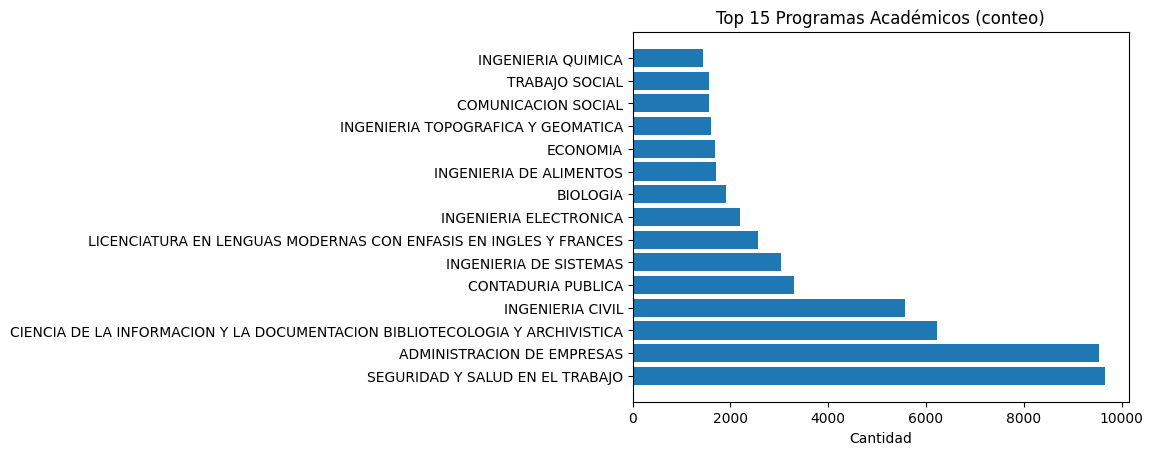

In [ ]:
# --- Barras Top 15 Programas Académicos ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

col = "PROGRAMA_ACADEMICO"
if col not in df.columns and "PROGRAMA" in df.columns:
    df = df.copy()
    df.rename(columns={"PROGRAMA": "PROGRAMA_ACADEMICO"}, inplace=True)

# Conteos (Top 15)
counts = df["PROGRAMA_ACADEMICO"].value_counts(dropna=False).head(15)

# Gráfico horizontal (mejor para etiquetas largas)
plt.figure()
y_pos = np.arange(len(counts))
plt.barh(y_pos, counts.values)
plt.yticks(y_pos, counts.index)
plt.xlabel("Cantidad")
plt.title("Top 15 Programas Académicos (conteo)")
plt.tight_layout()
plt.show()


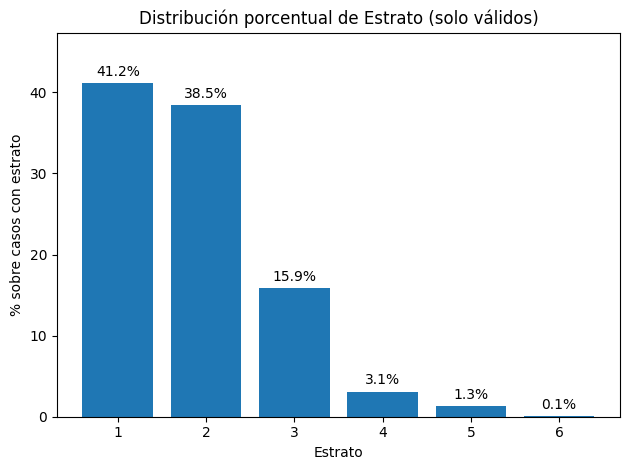

Tabla porcentual (solo válidos):
 estrato  porcentaje_%
       1          41.2
       2          38.5
       3          15.9
       4           3.1
       5           1.3
       6           0.1

'SIN ESTRATO' (faltantes o texto no numérico): 54.0% del total de filas.


In [ ]:
# --- Barras % de Estrato (1–6) + % faltantes ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Asegurar columna numérica
if "ESTRATO_NUM" not in df.columns and "ESTRATO" in df.columns:
    df = df.copy()
    df["ESTRATO_NUM"] = pd.to_numeric(df["ESTRATO"], errors="coerce")

x = pd.to_numeric(df["ESTRATO_NUM"], errors="coerce")

# Porcentajes por categoría (solo válidos) y % faltantes
cats = [1, 2, 3, 4, 5, 6]
pct_vals = (x.value_counts(normalize=True) * 100).reindex(cats, fill_value=0).sort_index()
pct_sin = 100 * (x.isna().sum()) / len(df)

# Gráfico
plt.figure()
plt.bar([str(c) for c in cats], pct_vals.values)
plt.xlabel("Estrato")
plt.ylabel("% sobre casos con estrato")
plt.title("Distribución porcentual de Estrato (solo válidos)")
for i, v in enumerate(pct_vals.values):
    plt.text(i, v + 0.5, f"{v:.1f}%", ha="center", va="bottom")
plt.ylim(0, max(pct_vals.values)*1.15 if len(pct_vals) else 1)
plt.tight_layout()
plt.show()

# Tabla rápida y % faltantes
print("Tabla porcentual (solo válidos):")
print(pd.DataFrame({"estrato": cats, "porcentaje_%": np.round(pct_vals.values, 1)}).to_string(index=False))
print(f"\n'SIN ESTRATO' (faltantes o texto no numérico): {pct_sin:.1f}% del total de filas.")


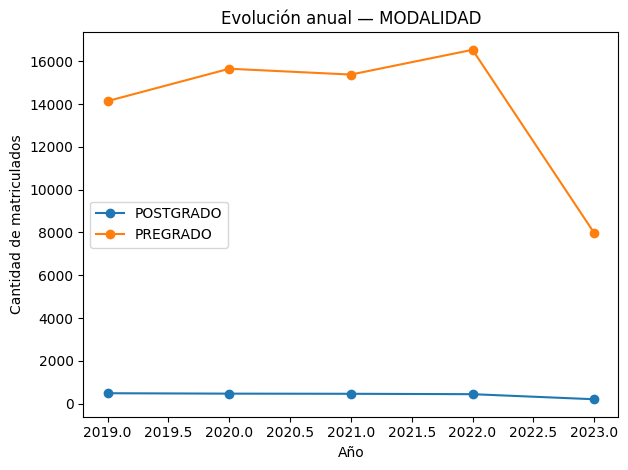

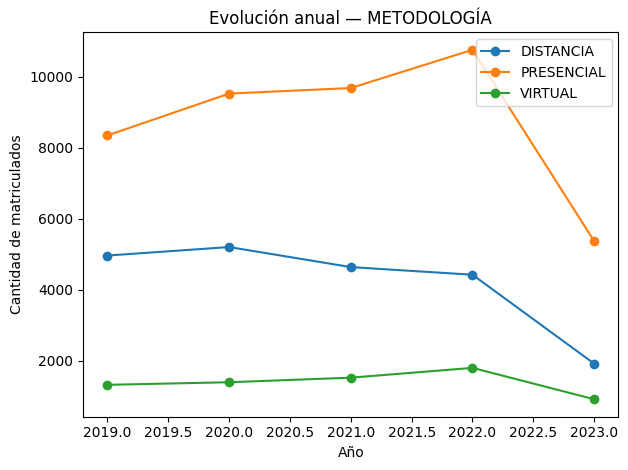

In [ ]:
# --- Evolución anual por MODALIDAD y por METODOLOGÍA ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = df.copy()

# Asegurar ANIO como numérico y ordenar
df["ANIO"] = pd.to_numeric(df["ANIO"], errors="coerce")
df = df[df["ANIO"].notna()].copy()
df["ANIO"] = df["ANIO"].astype(int)

# Normalización mínima de METODOLOGIA
if "METODOLOGIA" in df.columns:
    df["METODOLOGIA"] = df["METODOLOGIA"].replace({
        "DISTANCIA TRADICIONAL": "DISTANCIA",
        "DISTANCIA VIRTUAL": "VIRTUAL"
    })

def plot_lines_by_year(data, cat_col, top_k=3, title=""):
    tmp = data.dropna(subset=["ANIO", cat_col]).copy()
    if tmp.empty:
        print(f"Sin datos suficientes para {cat_col}."); return
    # Top categorías por volumen total
    top_cats = tmp[cat_col].value_counts().head(top_k).index.tolist()
    tmp = tmp[tmp[cat_col].isin(top_cats)]
    # Tabla año x categoría
    wide = (tmp.groupby(["ANIO", cat_col]).size()
              .unstack(fill_value=0)
              .sort_index())
    if wide.empty:
        print(f"Sin series para {cat_col}."); return

    plt.figure()
    for c in wide.columns:
        plt.plot(wide.index, wide[c], marker="o", label=str(c))
    plt.xlabel("Año"); plt.ylabel("Cantidad de matriculados")
    plt.title(title or f"Registros por año — {cat_col}")
    plt.legend()
    plt.tight_layout(); plt.show()

# 1) ANIO x MODALIDAD (Pregrado / Postgrado)
if "MODALIDAD" in df.columns:
    plot_lines_by_year(df, "MODALIDAD", top_k=3, title="Evolución anual — MODALIDAD")

# 2) ANIO x METODOLOGÍA (Presencial / Distancia / Virtual)
if "METODOLOGIA" in df.columns:
    plot_lines_by_year(df, "METODOLOGIA", top_k=3, title="Evolución anual — METODOLOGÍA")


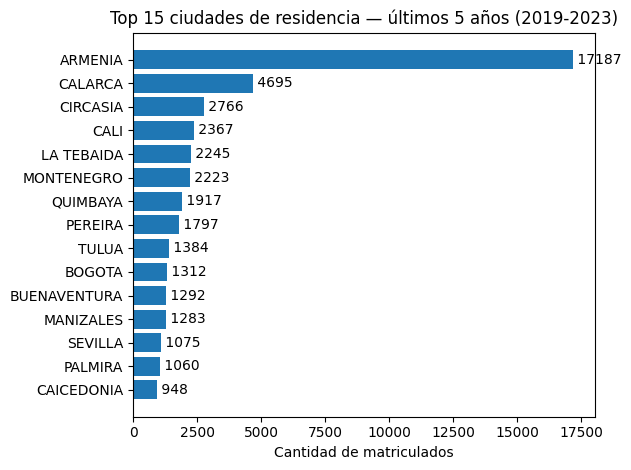

Periodo analizado: 2019-2023 | n=64520
              conteo  % periodo
CIUDAD_RESI                    
ARMENIA        17187       26.6
CALARCA         4695        7.3
CIRCASIA        2766        4.3
CALI            2367        3.7
LA TEBAIDA      2245        3.5
MONTENEGRO      2223        3.4
QUIMBAYA        1917        3.0
PEREIRA         1797        2.8
TULUA           1384        2.1
BOGOTA          1312        2.0
BUENAVENTURA    1292        2.0
MANIZALES       1283        2.0
SEVILLA         1075        1.7
PALMIRA         1060        1.6
CAICEDONIA       948        1.5


In [ ]:
# --- Top ciudades de residencia en los últimos 5 años ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TOPK = 15
EXCLUIR_SIN_INFO = True
EXCLUIR_OTRAS = True

df = df.copy()
df["ANIO"] = pd.to_numeric(df["ANIO"], errors="coerce")
max_year = int(df["ANIO"].dropna().max())
desde = max_year - 4  # ventana de 5 años

sub = df[df["ANIO"].between(desde, max_year, inclusive="both")].copy()
sub = sub.dropna(subset=["CIUDAD_RESI"])

if EXCLUIR_SIN_INFO:
    sub = sub[sub["CIUDAD_RESI"] != "SIN INFO"]
if EXCLUIR_OTRAS:
    sub = sub[sub["CIUDAD_RESI"] != "OTRAS CIUDADES"]

# Conteos TopK
counts = sub["CIUDAD_RESI"].value_counts().head(TOPK).sort_values()

plt.figure()
y = np.arange(len(counts))
plt.barh(y, counts.values)
plt.yticks(y, counts.index)
plt.xlabel("Cantidad de matriculados")
plt.title(f"Top {TOPK} ciudades de residencia — últimos 5 años ({desde}-{max_year})")
# Etiquetas con valores
for i, v in enumerate(counts.values):
    plt.text(v, i, f" {v}", va="center")
plt.tight_layout()
plt.show()

# Tabla con % sobre el total del periodo
tabla = counts.sort_values(ascending=False).to_frame("conteo")
tabla["% periodo"] = (tabla["conteo"] / sub.shape[0] * 100).round(1)
print(f"Periodo analizado: {desde}-{max_year} | n={sub.shape[0]}")
print(tabla.to_string())


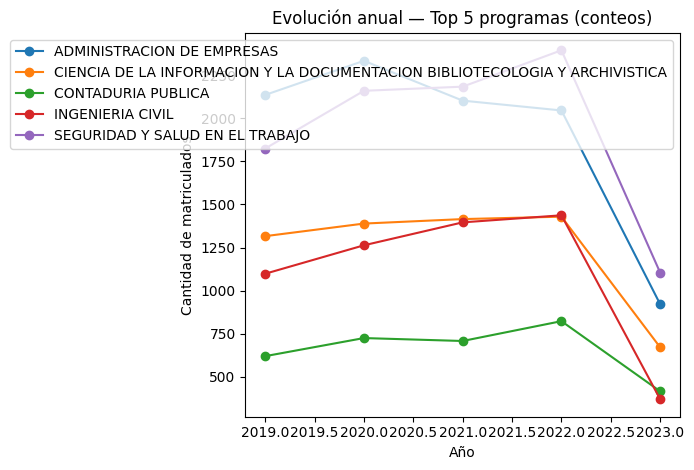

Top 5 en 2023:
                                                                             conteo  % del año
PROGRAMA_ACADEMICO                                                                            
SEGURIDAD Y SALUD EN EL TRABAJO                                                1104       31.7
ADMINISTRACION DE EMPRESAS                                                      921       26.5
CIENCIA DE LA INFORMACION Y LA DOCUMENTACION BIBLIOTECOLOGIA Y ARCHIVISTICA     671       19.3
CONTADURIA PUBLICA                                                              416       11.9
INGENIERIA CIVIL                                                                370       10.6


In [ ]:
# --- Líneas: Top 5 programas por año ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = df.copy()

# Garantizar columnas
if "PROGRAMA_ACADEMICO" not in df.columns and "PROGRAMA" in df.columns:
    df.rename(columns={"PROGRAMA": "PROGRAMA_ACADEMICO"}, inplace=True)
assert "PROGRAMA_ACADEMICO" in df.columns, "Falta PROGRAMA/PROGRAMA_ACADEMICO."
assert "ANIO" in df.columns and df["ANIO"].notna().any(), "Falta ANIO (derívalo desde VIGENCIA)."

# Top 5 por volumen total
TOPK = 5
top5 = df["PROGRAMA_ACADEMICO"].value_counts().head(TOPK).index.tolist()

# Tabla año x programa (solo top5)
tmp = df[df["PROGRAMA_ACADEMICO"].isin(top5)].copy()
tmp["ANIO"] = pd.to_numeric(tmp["ANIO"], errors="coerce").dropna()
wide = (tmp.groupby(["ANIO","PROGRAMA_ACADEMICO"]).size()
          .unstack(fill_value=0)
          .sort_index())

if wide.empty:
    print("No hay datos para graficar Top 5 programas por año.")
else:
    plt.figure()
    for col in wide.columns:
        plt.plot(wide.index, wide[col], marker="o", label=str(col))
    plt.xlabel("Año")
    plt.ylabel("Cantidad de matriculados")
    plt.title("Evolución anual — Top 5 programas (conteos)")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Tabla auxiliar: último año (ranking)
    last_year = int(wide.index.max())
    ranking_last = wide.loc[last_year].sort_values(ascending=False).to_frame("conteo")
    ranking_last["% del año"] = (ranking_last["conteo"] / wide.loc[last_year].sum() * 100).round(1)
    print(f"Top 5 en {last_year}:")
    print(ranking_last.to_string())


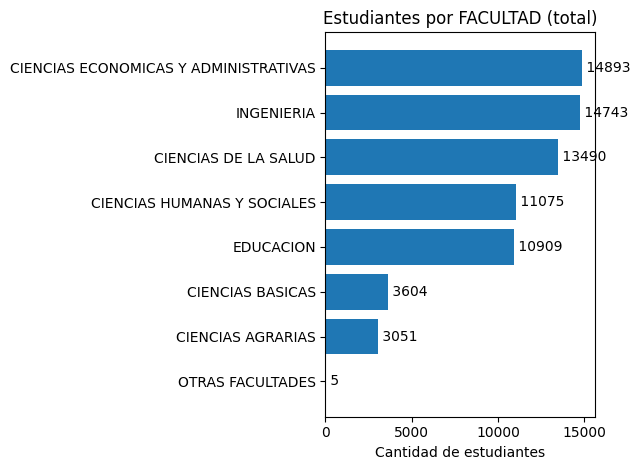


=== Tabla: Estudiantes por FACULTAD (total) ===
                                       conteo
FACULTAD                                     
CIENCIAS ECONOMICAS Y ADMINISTRATIVAS   14893
INGENIERIA                              14743
CIENCIAS DE LA SALUD                    13490
CIENCIAS HUMANAS Y SOCIALES             11075
EDUCACION                               10909
CIENCIAS BASICAS                         3604
CIENCIAS AGRARIAS                        3051
OTRAS FACULTADES                            5


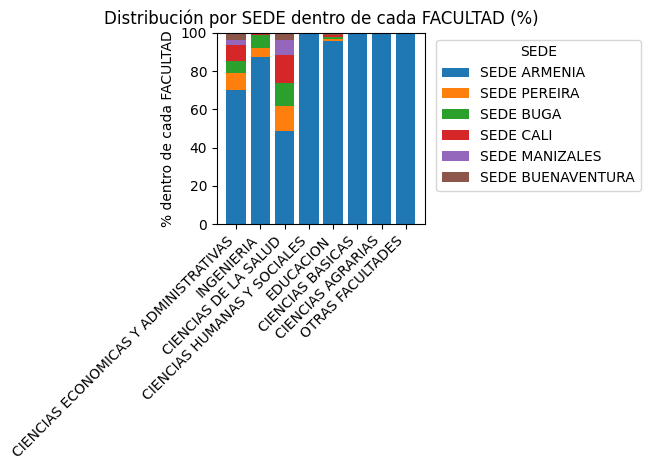


=== Tabla: % de SEDE dentro de cada FACULTAD ===
SEDE                                   SEDE ARMENIA  SEDE PEREIRA  SEDE BUGA  SEDE CALI  SEDE MANIZALES  SEDE BUENAVENTURA
FACULTAD                                                                                                                  
CIENCIAS ECONOMICAS Y ADMINISTRATIVAS          70.0           8.8        6.7        8.2             2.7                3.7
INGENIERIA                                     87.2           4.9        6.6        0.8             0.2                0.1
CIENCIAS DE LA SALUD                           48.8          12.9       12.1       14.3             8.2                3.6
CIENCIAS HUMANAS Y SOCIALES                   100.0           0.0        0.0        0.0             0.0                0.0
EDUCACION                                      96.0           0.9        1.2        1.1             0.0                0.9
CIENCIAS BASICAS                              100.0           0.0        0.0        0.0  

In [ ]:
# === Facultades con más estudiantes + Distribución por Sede (% dentro de cada facultad) ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

assert "FACULTAD" in df.columns, "Falta la columna FACULTAD."
assert "SEDE" in df.columns, "Falta la columna SEDE."

# -------------------------------
# 1) Ranking de FACULTAD (conteos)
# -------------------------------
counts_fac = df["FACULTAD"].value_counts(dropna=False)
counts_fac_sorted = counts_fac.sort_values()  # asc para barh (menor abajo, mayor arriba)

plt.figure()
y = np.arange(len(counts_fac_sorted))
plt.barh(y, counts_fac_sorted.values)
plt.yticks(y, counts_fac_sorted.index)
plt.xlabel("Cantidad de estudiantes")
plt.title("Estudiantes por FACULTAD (total)")
# anotar valores
for i, v in enumerate(counts_fac_sorted.values):
    plt.text(v, i, f" {v}", va="center")
plt.tight_layout()
plt.show()

print("\n=== Tabla: Estudiantes por FACULTAD (total) ===")
print(counts_fac.sort_values(ascending=False).to_frame("conteo").to_string())

# ---------------------------------------------------------
# 2) Barras apiladas %: SEDE dentro de cada FACULTAD (mix)
# ---------------------------------------------------------
# crosstab de porcentajes por fila (facultad)
ct_pct = pd.crosstab(df["FACULTAD"], df["SEDE"], normalize="index") * 100

# Ordenar filas por tamaño total de facultad (desc)
fac_order = counts_fac.sort_values(ascending=False).index
ct_pct = ct_pct.reindex(fac_order)

# (Opcional) ordenar columnas (sedes) por su peso total en el dataset, de mayor a menor
sede_order = df["SEDE"].value_counts().index
ct_pct = ct_pct.reindex(columns=sede_order)

plt.figure()
bottom = np.zeros(len(ct_pct))
for col in ct_pct.columns:
    vals = ct_pct[col].values
    plt.bar(ct_pct.index, vals, bottom=bottom, label=str(col))
    bottom = bottom + vals

plt.xticks(rotation=45, ha="right")
plt.ylabel("% dentro de cada FACULTAD")
plt.title("Distribución por SEDE dentro de cada FACULTAD (%)")
plt.legend(title="SEDE", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

print("\n=== Tabla: % de SEDE dentro de cada FACULTAD ===")
print(ct_pct.round(1).to_string())


## Interpretaciones relevantes

### 1) Perfil socioeconómico de la matrícula
- **Predomina estrato 1–2** (media≈1.85; mediana=2; moda=1) y la **variación es baja** (std≈0.90, IQR=1).  
  **Implicación:** las políticas y servicios deben priorizar **accesibilidad económica** (becas, fraccionamiento de pago, monitorías remuneradas).

### 2) Diferencias por oferta (donde sí aparecen matices)
- **Postgrado** y **Metodología Virtual** muestran **ligeramente más heterogeneidad** socioeconómica.  
  **Implicación:** en estas modalidades conviene reforzar **acompañamiento flexible** (tutorías asincrónicas, horarios extendidos, soporte tech) y **opciones de financiamiento** variadas.

### 3) Programas con mayor/menor mezcla socioeconómica
- **Más heterogéneos:** Biología, Economía (std más altas).  
  **Más compactos:** Ingeniería Civil, Medicina (std más bajas).  
  **Implicación:** en programas **más heterogéneos** pueden aparecer **brechas académicas** y **de recursos**; priorizar **nivelaciones**, **acceso a laboratorios/biblioteca**, y **apoyos focalizados**.  
  En programas **más compactos**, centrar esfuerzos en **escalabilidad** de cupos y **eficiencia** operativa.

### 4) Territorio y sedes
- **Ciudades de origen** y **sedes** muestran patrones **parecidos** (sin brechas fuertes); el peso de **Armenia, Calarcá y municipios cercanos** es alto en la matrícula total.  
  **Implicación:** la planeación de **capacidad por sede** (aulas, laboratorios, bienestar) se puede hacer con **parámetros homogéneos**, ajustando solo por volumen.

### 5) Evolución reciente
- Con las **líneas por año**, se observa la dinámica **Pregrado vs Postgrado** y **Presencial/Distancia/Virtual**.  
  **Implicación:** si **Virtual** o **Postgrado** crecen, prever **infraestructura digital**, **docencia capacitada en e-learning** y **servicios no presenciales** (orientación, biblioteca, salud mental).

### 6) Carreras líderes y concentración
- El **Top 5 de programas** concentra gran parte de la matrícula; la **área apilada %** muestra si ganan o pierden participación.  
  **Implicación:** para **alta concentración**, cuidar **riesgo institucional** (dependencia de pocos programas) y evaluar **diversificación**; para **pérdida de cuota**, revisar **currículo, empleabilidad, marketing**.

